# <u>Group Project: Kickstarter Campaign</u>

Kickstarter is a company that provides the space for independent artists, creative, innovators, and entrepreneurs to bring their unique projects to life. Kickstarter allows anyone to financially support the project through an online pledging system - this means; anyone can pledge a specific amount of money towards the funding goal of the project. Kickstarter projects (also called campaigns) are all-or-nothing -- meaning, if the funding goal isn't met 100% (or exceeded), the project campaign fails and no funding is provided. The stakes are high - but what is it about certain campaigns that make them succeed while others fail? 

You have joined the marketing team for Kickstarter and you are tasked with exploring the features of several campaigns over the past few years. You are responsible for looking at this dataset and pulling out key insights about the characteristics of Kickstarter campaigns that make them more likely to succeed or fail. The marketing team at Kickstarter has a limited amount of funds to devote to highlighting specific projects, and they want to highlight projects that have the best chance of succeeding (i.e. meeting the funding goal). Can you help them determine who that might be?

Complete the steps below to take a dataset from inception to insights, for the purpose of answering the following two questions:

    1. What kinds of projects should the Kickstarter Marking Team focus their attention on?
    2. Why should the Marketing Team focus their attention in that direction?

After you have combed through the data, your group will put together a presentation (including visualizations), that clearly answers the two questions above. The Kickstarter dataset is posted to Canvas. Complete the code in the notebook below to complete the project. <b> You are NOT restricted to the steps laid out in this notebook to complete your project, You can conduct additional analyses or create additional visualizations. This notebook is everything you need to cover, but feel free to expand on these steps! This includes completing regression analyses with the dataset.</b>

## <font color=red>Part 1: Domain Knowledge</font>

Before you begin looking at the data, you need to expand your knowledge of the subject matter. Start by visiting www.kickstarter.com and read all you can about the company. What is the objective of the company? How does it work? What does the project timeline look like? You should research the company until you feel comfortable speaking about the basics of Kickstarter projects. Use the space below (double-click the cell to activate) to write a brief paragraph about what you learned about Kickstarter. 

### <font color=red>Questions to Answer</font>
1. What is Kickstarter?
2. What is the purpose of Kickstarter?
3. Who are the "backers" of a Kickstarter campaign?
4. How is success determined for a project campaign?

****

### <font color=red>KICKSTARTER INFORMATION</font>

#### In a nutshell:
Kickstarter is an online funding platform designed as a connection between creativity and capital. Its purpose is to break free from a central focus on profit at all costs.  The "backers" are individuals or groups that pledge money if a project gets fully funded. Success is determined as a project meeting its funding goal within its timeline.


## <font color=darkorange>Part 2: Data Import and Cleaning</font>

Now that you are familiar with where the data is coming from, you are ready to start examining the data. The Kickstarter Dataset is a collection of project campaign information from 2016. Data includes information about the project name, length, country of origin, goal, and the amount of money raised, etc. If you open the Kickstarter Dataset in excel, the second tab provides descriptions of each of the columns/variables. Import the dataset into this notebook and follow the steps below to gather information about the data and to clean up the dataset. Use the space below (double-click the cell to activate) to write a brief paragraph describing the dataset and the steps you took while cleaning the data. 

### <font color=darkorange>Questions to Answer</font>
1. How many columns are in the dataset? How many rows?
2. What type of variables (continuous, categorical) make up this dataset?
3. Which variables have missing values? 
4. How did you handle the missing data in the dataset?
5. How many rows are in your dataset after handling missing data?
6. Are there any odd or inappropriate values within a column that don't make sense? If so, what are they?
7. What percentage of the each project was funded? In other words, how close were they to reaching the goal? You will need to create a new variable to answer this question.

***

### <font color=darkorange>DATASET INFORMATION AND CLEANING</font>

#### Answers below:
1. 281,856 rows and 14 columns
2. All types of variables - integer, decimal, date/time, and categorical
3. missing variables in the following categories: name, usd pledged
4. a project without a name is still a project, so just changed the name to unknown; a project without pledges, though, is neither a success nor a failure and therefore useless to include in dataset (dropped)
5. 281,646 rows after handling missing data
6. I found no odd or inappropriate values in any of the columns, including usd pledged, which has no negative values
7. done

In [1480]:
## import libraries and import Kickstarter dataset
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm
import scipy.stats as stats

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

df = pd.read_excel("Kickstarter_Dataset.xlsx")

## this is a large dataset, we want to see all rows 
# pd.set_option('display.max_rows', None)


## this is a very large dataset, be patient, it may take a while to import!!



In [1481]:
## determine dataset shape (number of rows and columns)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281856 entries, 0 to 281855
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             281856 non-null  int64         
 1   name           281821 non-null  object        
 2   main_category  281856 non-null  object        
 3   category       281856 non-null  object        
 4   country        281856 non-null  object        
 5   currency       281856 non-null  object        
 6   launched       281856 non-null  datetime64[ns]
 7   deadline       281856 non-null  datetime64[ns]
 8   length_days    281856 non-null  int64         
 9   goal           281856 non-null  float64       
 10  pledged        281856 non-null  float64       
 11  usd pledged    281646 non-null  float64       
 12  backers        281856 non-null  int64         
 13  state          281856 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(3), object(6

In [1482]:
df["usd_pledged"] = df["usd pledged"]
df.head()

,ID,name,main_category,category,country,currency,launched,deadline,length_days,goal,pledged,usd pledged,backers,state,usd_pledged
0,1009317190,French Cuisine,Food,Cookbooks,US,USD,2014-08-09 03:16:02,2014-09-08 00:46:23,29,13730.0,3984.0,3984.000000,46,failed,3984.000000
1,1618024139,HotRod Henry SUPERCHARGED - the ultimate 3D pr...,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,2016-07-21 23:59:00,35,75000.0,7386.0,1561.784015,31,failed,1561.784015
2,2004838949,PHAbulous Philaments - 3D printing: natural an...,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,2015-08-21 12:08:26,30,15000.0,3834.0,4152.402045,46,failed,4152.402045
3,258770123,Schokostruder - Chocolate & Liquid Extruder f...,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,2016-02-24 18:48:09,30,20000.0,18.0,19.435528,6,failed,19.435528
4,690137136,StarterMate - the 3D printing starter kit for ...,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,2015-11-09 00:26:43,40,20000.0,2598.0,2908.076574,29,failed,2908.076574


In [1483]:
df.drop(columns = "usd pledged", inplace = True)
df.head()

,ID,name,main_category,category,country,currency,launched,deadline,length_days,goal,pledged,backers,state,usd_pledged
0,1009317190,French Cuisine,Food,Cookbooks,US,USD,2014-08-09 03:16:02,2014-09-08 00:46:23,29,13730.0,3984.0,46,failed,3984.000000
1,1618024139,HotRod Henry SUPERCHARGED - the ultimate 3D pr...,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,2016-07-21 23:59:00,35,75000.0,7386.0,31,failed,1561.784015
2,2004838949,PHAbulous Philaments - 3D printing: natural an...,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,2015-08-21 12:08:26,30,15000.0,3834.0,46,failed,4152.402045
3,258770123,Schokostruder - Chocolate & Liquid Extruder f...,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,2016-02-24 18:48:09,30,20000.0,18.0,6,failed,19.435528
4,690137136,StarterMate - the 3D printing starter kit for ...,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,2015-11-09 00:26:43,40,20000.0,2598.0,29,failed,2908.076574


In [1484]:
## determine which variables have missing data 
df.isnull().sum()


ID                 0
name              35
main_category      0
category           0
country            0
currency           0
launched           0
deadline           0
length_days        0
goal               0
pledged            0
backers            0
state              0
usd_pledged      210
dtype: int64

In [1485]:
## handling missing data

## fill all the missing values in "name" with "Unknown Project Name"
df["name"].replace(np.nan, "Unknown Project Name", inplace = True)
#checking to see that it was done correctly
df.loc[df["name"]=="Unknown Project Name"]

## drop all the rows where "usd pledged" is missing
df.dropna(subset=["usd_pledged"], inplace = True)

# checking for missing values
df.isnull().sum()

ID               0
name             0
main_category    0
category         0
country          0
currency         0
launched         0
deadline         0
length_days      0
goal             0
pledged          0
backers          0
state            0
usd_pledged      0
dtype: int64

In [1486]:
## inappropriate values in categorical variables; check value counts
df.info()
df["main_category"].value_counts()
df["category"].value_counts()
df["country"].value_counts()
df["currency"].value_counts()
df["state"].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281646 entries, 0 to 281855
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             281646 non-null  int64         
 1   name           281646 non-null  object        
 2   main_category  281646 non-null  object        
 3   category       281646 non-null  object        
 4   country        281646 non-null  object        
 5   currency       281646 non-null  object        
 6   launched       281646 non-null  datetime64[ns]
 7   deadline       281646 non-null  datetime64[ns]
 8   length_days    281646 non-null  int64         
 9   goal           281646 non-null  float64       
 10  pledged        281646 non-null  float64       
 11  backers        281646 non-null  int64         
 12  state          281646 non-null  object        
 13  usd_pledged    281646 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(3), object(6

failed        168503
successful    113143
Name: state, dtype: int64

In [1487]:
df.loc[df["usd_pledged"]<0].index

Int64Index([], dtype='int64')

In [1488]:
df3 = df.copy()

In [1489]:
## drop unneeded columns (project ID, name, pledged, launched, deadline)
# you will use usd pledged from now on

df3.drop(columns = ["ID", "name", "launched", "deadline"], inplace = True)

df3.head()


,main_category,category,country,currency,length_days,goal,pledged,backers,state,usd_pledged
0,Food,Cookbooks,US,USD,29,13730.0,3984.0,46,failed,3984.000000
1,Technology,3D Printing,AT,EUR,35,75000.0,7386.0,31,failed,1561.784015
2,Technology,3D Printing,AT,EUR,30,15000.0,3834.0,46,failed,4152.402045
3,Technology,3D Printing,AT,EUR,30,20000.0,18.0,6,failed,19.435528
4,Technology,3D Printing,AT,EUR,40,20000.0,2598.0,29,failed,2908.076574


In [1490]:
# create a new column
## percentage of project that was funded - how close were they to reaching the goal?

df3["pct_funded"] = (df3["pledged"]/df3["goal"])*100

In [1491]:
df3.describe()

,length_days,goal,pledged,backers,usd_pledged,pct_funded
count,281646.000000,2.816460e+05,2.816460e+05,281646.000000,2.816460e+05,2.816460e+05
mean,33.976520,4.181597e+04,9.441571e+03,111.934801,8.575848e+03,3.251992e+02
std,12.894187,1.043830e+06,9.406700e+04,996.631624,8.916948e+04,2.709311e+04
min,1.000000,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,30.000000,2.000000e+03,5.000000e+01,2.000000,4.000000e+01,7.400000e-01
50%,30.000000,5.000000e+03,7.710000e+02,15.000000,6.910000e+02,1.951317e+01
75%,36.000000,1.500000e+04,4.448875e+03,62.000000,4.109040e+03,1.088000e+02
max,92.000000,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,1.042779e+07


In [1492]:
df3.corr()

,length_days,goal,pledged,backers,usd_pledged,pct_funded
length_days,1.000000,0.022077,0.006749,-0.001391,0.006316,0.000225
goal,0.022077,1.000000,0.007927,0.006090,0.007617,-0.000447
pledged,0.006749,0.007927,1.000000,0.750483,0.950399,0.008708
backers,-0.001391,0.006090,0.750483,1.000000,0.716784,0.017162
usd_pledged,0.006316,0.007617,0.950399,0.716784,1.000000,0.006988
pct_funded,0.000225,-0.000447,0.008708,0.017162,0.006988,1.000000


## <font color=#EAC117>Part 3: Exploratory Analysis</font>

With a clean dataset, you are now ready to start exploring the variables in your dataset. Don't worry about how your variables relate to each other - we will cover that in the next section. For now, it's more important that you get a clear sense of the variable characteristics on their own. Follow the steps below to explore all of the variables within your dataset and preform descriptive statistics. In addition to the descriptive statistics, you are tasked with creating a visualizations related to your results. Stylistic choices related to the visualizations is up to your group. Use the space below (double-click the cell to activate) to write a brief paragraph describing the steps you took to explore the data. 

### <font color=#EAC117>Questions to Answer</font>
1.	What is the average (mean) for the following variables: goal, usd pledged, backers, and length? 
2.	What is the maximum value, minimum value, and range for the following variables: goal, usd pledged, backers, and length?
3.	What is the most common (mode) length for campaign projects?
4.	Considering the categorical variables, what is the most frequent main category group? How many projects are classified under this category? What is the most frequent sub-category? How many projects are classified under this category? 
5.	Considering the categorical variables, what is the least frequent main category group? How many projects are classified under this category? What is the least frequent sub-category? How many projects are classified under this category? 
6.	Which country has started the most Kickstarter campaigns?
7.	How many projects have failed? How many projects have succeeded?

### <font color=#EAC117>Visualizations to Create</font> 
* Number of Projects by Main Category
* Number of projects by State (outcome)
* Number of projects from each country
* Number of successful projects and failed projects by Main Category

***

### <font color=#EAC117>EXPLORATORY DATA ANALYSIS</font>

#### Start your paragraph here . . . Be sure to answer all questions in this space!

In [1493]:
df3["avg_pledge_per_backer"] = (df3["pledged"]/df3["backers"])
df3.head()

,main_category,category,country,currency,length_days,goal,pledged,backers,state,usd_pledged,pct_funded,avg_pledge_per_backer
0,Food,Cookbooks,US,USD,29,13730.0,3984.0,46,failed,3984.000000,29.016752,86.608696
1,Technology,3D Printing,AT,EUR,35,75000.0,7386.0,31,failed,1561.784015,9.848000,50.380130
2,Technology,3D Printing,AT,EUR,30,15000.0,3834.0,46,failed,4152.402045,25.560000,90.269610
3,Technology,3D Printing,AT,EUR,30,20000.0,18.0,6,failed,19.435528,0.090000,3.239255
4,Technology,3D Printing,AT,EUR,40,20000.0,2598.0,29,failed,2908.076574,12.990000,100.278503


In [1494]:
# removing pct_funded outliers

df3["zscore_pct_funded"] = np.abs(stats.zscore(df3["pct_funded"]))

df3 = df3[df3["zscore_pct_funded"]<=3]

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281547 entries, 0 to 281855
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   main_category          281547 non-null  object 
 1   category               281547 non-null  object 
 2   country                281547 non-null  object 
 3   currency               281547 non-null  object 
 4   length_days            281547 non-null  int64  
 5   goal                   281547 non-null  float64
 6   pledged                281547 non-null  float64
 7   backers                281547 non-null  int64  
 8   state                  281547 non-null  object 
 9   usd_pledged            281547 non-null  float64
 10  pct_funded             281547 non-null  float64
 11  avg_pledge_per_backer  248193 non-null  float64
 12  zscore_pct_funded      281547 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 30.1+ MB


In [1533]:
#removing pledged outliers

df3["zscore_pledged"] = np.abs(stats.zscore(df3["pledged"]))

usd_pledged_outlier = df3.loc[df3["zscore_pledged"]>3]

df3 = df3[df3['zscore_pledged']<=3]

df3.describe()

,length_days,goal,pledged,backers,usd_pledged,pct_funded,avg_pledge_per_backer,zscore_pct_funded,zscore_usd_pledged,zscore_length_days,zscore_goal,zscore_backers,zscore_pledged
count,263361.000000,2.633610e+05,263361.000000,263361.000000,263361.000000,263361.000000,2.305420e+05,2.633610e+05,2.633610e+05,263361.000000,263361.000000,263361.000000,263361.000000
mean,33.342879,2.051180e+04,2909.260022,44.233979,2810.327630,83.798527,inf,1.082323e-02,8.130837e-02,0.683764,0.039726,0.167509,0.498683
std,11.808814,9.585781e+04,4966.471363,85.058238,4971.352614,761.904724,NaN,2.744231e-02,2.977545e-02,0.610429,0.084759,0.132244,0.411451
min,1.000000,1.500000e-01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.893195e-08,3.859857e-07,0.002182,0.000086,0.000779,0.000003
25%,30.000000,2.000000e+03,35.000000,2.000000,30.000000,0.555556,2.257618e+01,8.117179e-03,7.001031e-02,0.307859,0.029968,0.120471,0.328671
50%,30.000000,5.000000e+03,615.000000,13.000000,552.000000,14.902500,4.459169e+01,1.150151e-02,9.280897e-02,0.307859,0.034977,0.176605,0.477451
75%,35.000000,1.250000e+04,3395.000000,50.000000,3186.752684,106.125200,7.681117e+01,1.198459e-02,9.728198e-02,0.927941,0.038078,0.192323,0.501419
max,72.000000,3.141592e+06,27462.000000,1413.000000,46923.928950,81100.000000,inf,2.981383e+00,4.379494e-01,2.947572,2.957890,2.978142,2.999572


In [1534]:
#removing length_days outliers

df3["zscore_length_days"] = np.abs(stats.zscore(df3["length_days"]))

df3 = df3[df3['zscore_length_days']<=3]

df3.describe()

,length_days,goal,pledged,backers,usd_pledged,pct_funded,avg_pledge_per_backer,zscore_pct_funded,zscore_usd_pledged,zscore_length_days,zscore_goal,zscore_backers,zscore_pledged
count,263049.000000,2.630490e+05,263049.000000,263049.000000,263049.000000,263049.000000,2.302700e+05,2.630490e+05,2.630490e+05,263049.000000,263049.000000,263049.000000,263049.000000
mean,33.298876,2.052668e+04,2909.174132,44.233706,2810.124396,83.821668,inf,1.082457e-02,8.131396e-02,0.720769,0.039733,0.167516,0.498727
std,11.746396,9.591266e+04,4966.912080,85.051664,4971.795805,762.351961,NaN,2.745842e-02,2.977492e-02,0.685540,0.084808,0.132215,0.411486
min,1.000000,1.500000e-01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.893195e-08,3.859857e-07,0.029036,0.000086,0.000779,0.000003
25%,30.000000,2.000000e+03,35.000000,2.000000,30.000000,0.555556,2.255556e+01,8.117363e-03,7.003927e-02,0.283084,0.029968,0.120471,0.328799
50%,30.000000,5.000000e+03,614.000000,13.000000,552.000000,14.890000,4.458333e+01,1.150206e-02,9.280897e-02,0.283084,0.034977,0.176605,0.477573
75%,35.000000,1.250000e+04,3394.000000,50.000000,3186.000000,106.123077,7.680000e+01,1.198459e-02,9.728198e-02,0.987156,0.038078,0.192323,0.501419
max,68.000000,3.141592e+06,27462.000000,1413.000000,46923.928950,81100.000000,inf,2.981383e+00,4.379494e-01,2.934858,2.957890,2.978142,2.999572


In [1535]:
#removing goal outliers

df3["zscore_goal"] = np.abs(stats.zscore(df3["goal"]))

df3 = df3[df3['zscore_goal']<=3]

df3.describe()

,length_days,goal,pledged,backers,usd_pledged,pct_funded,avg_pledge_per_backer,zscore_pct_funded,zscore_usd_pledged,zscore_length_days,zscore_goal,zscore_backers,zscore_pledged
count,260937.000000,260937.000000,260937.000000,260937.000000,260937.000000,260937.000000,2.287550e+05,2.609370e+05,2.609370e+05,260937.000000,260937.000000,260937.000000,260937.000000
mean,33.243266,13907.881289,2920.909288,44.510334,2822.831806,84.497941,inf,1.081511e-02,8.122106e-02,0.718432,0.198330,0.167385,0.498481
std,11.707803,29478.816162,4970.634940,85.268814,4976.797263,765.393744,NaN,2.756912e-02,2.981899e-02,0.683296,0.244728,0.132639,0.412043
min,1.000000,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.893195e-08,3.859857e-07,0.029036,0.000174,0.000779,0.000003
25%,30.000000,2000.000000,38.000000,2.000000,30.751584,0.625000,2.273170e+01,8.111628e-03,6.975928e-02,0.283084,0.120179,0.119784,0.327390
50%,30.000000,5000.000000,625.000000,13.000000,564.000000,15.450000,4.466667e+01,1.148077e-02,9.269486e-02,0.283084,0.177523,0.176605,0.476686
75%,35.000000,12000.000000,3420.000000,51.000000,3210.000000,106.294118,7.677930e+01,1.198422e-02,9.725916e-02,0.987156,0.203589,0.192323,0.501419
max,68.000000,308124.000000,27462.000000,1413.000000,46923.928950,81100.000000,inf,2.981383e+00,4.379494e-01,2.934858,2.998539,2.978142,2.999572


In [1536]:
#removing backers outliers

df3["zscore_backers"] = np.abs(stats.zscore(df3["backers"]))

df3 = df3[df3['zscore_backers']<=3]

df3.describe()

,length_days,goal,pledged,backers,usd_pledged,pct_funded,avg_pledge_per_backer,zscore_pct_funded,zscore_usd_pledged,zscore_length_days,zscore_goal,zscore_backers,zscore_pledged
count,255455.000000,255455.000000,255455.000000,255455.000000,255455.000000,255455.000000,2.232730e+05,2.554550e+05,2.554550e+05,255455.000000,255455.000000,255455.000000,255455.000000
mean,33.272948,13919.101953,2614.332991,35.411086,2522.698457,78.195160,inf,1.078983e-02,8.066917e-02,0.722176,0.199706,0.486872,0.472834
std,11.758320,29649.745813,4471.019643,52.931812,4447.549886,739.976193,NaN,2.669576e-02,2.806996e-02,0.685540,0.245819,0.399614,0.360061
min,1.000000,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.893195e-08,3.859857e-07,0.029036,0.000174,0.005743,0.000003
25%,30.000000,1800.000000,35.000000,2.000000,29.862143,0.555556,2.258333e+01,8.140227e-03,7.013241e-02,0.283084,0.121222,0.298934,0.322042
50%,30.000000,5000.000000,575.000000,12.000000,520.000000,14.000000,4.500000e+01,1.152322e-02,9.266324e-02,0.283084,0.177523,0.463363,0.474774
75%,35.000000,12000.000000,3125.000000,47.000000,3000.000000,105.285714,7.781818e+01,1.198459e-02,9.725916e-02,0.987156,0.203589,0.522001,0.501419
max,68.000000,308124.000000,27462.000000,300.000000,44262.811260,81100.000000,inf,2.981383e+00,4.075841e-01,2.934858,2.998539,2.996291,2.999572


In [1537]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255455 entries, 0 to 281855
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   main_category          255455 non-null  object 
 1   category               255455 non-null  object 
 2   country                255455 non-null  object 
 3   currency               255455 non-null  object 
 4   length_days            255455 non-null  int64  
 5   goal                   255455 non-null  float64
 6   pledged                255455 non-null  float64
 7   backers                255455 non-null  int64  
 8   state                  255455 non-null  object 
 9   usd_pledged            255455 non-null  float64
 10  pct_funded             255455 non-null  float64
 11  avg_pledge_per_backer  223273 non-null  float64
 12  zscore_pct_funded      255455 non-null  float64
 13  zscore_usd_pledged     255455 non-null  float64
 14  zscore_length_days     255455 non-nu

In [1538]:
#finding mode of campaign lengths
df3["length_days"].mode()

0    30
dtype: int64

In [1539]:
## calculate the range for all numeric variables
days_range = df3["length_days"].max() - df3["length_days"].min()
goal_range = df3["goal"].max() - df3["goal"].min()
pledged_range = df3["usd_pledged"].max() - df3["usd_pledged"].min()
backers_range = df3["backers"].max() - df3["backers"].min()
pct_funded_range = df3["pct_funded"].max() - df3["pct_funded"].min()

print("Ranges")
print("--"*18)
print(f"Project length:\t\t{days_range} days")
print(f"Goal Amount:\t\t${int(goal_range)}")
print(f"USD Pledged Amount:\t${int(pledged_range)}")
print(f"Number of Backers:\t{int(backers_range)}")
print(f"Percent Funded:\t\t{int(pct_funded_range)*100}%")

Ranges
------------------------------------
Project length:		67 days
Goal Amount:		$308123
USD Pledged Amount:	$44262
Number of Backers:	300
Percent Funded:		8110000%


In [1540]:
## frequency of categorical variable groups
df3["main_category"].value_counts()


Film & Video    46355
Music           38787
Publishing      28727
Art             20904
Technology      17852
Games           17603
Food            17585
Design          16108
Fashion         14850
Theater          8889
Photography      8270
Comics           6924
Crafts           6163
Journalism       3318
Dance            3120
Name: main_category, dtype: int64

In [1541]:
df3["category"].value_counts()

Documentary           11485
Product Design        11314
Shorts                10361
Music                 10005
Food                   8886
Fiction                7089
Film & Video           7072
Fashion                6579
Video Games            6366
Nonfiction             6278
Theater                6134
Tabletop Games         6110
Art                    5962
Rock                   5594
Children's Books       4943
Photography            4789
Indie Rock             4738
Webseries              4493
Apparel                4399
Technology             3908
Publishing             3863
Narrative Film         3829
Apps                   3800
Comics                 3720
Country & Folk         3659
Crafts                 3317
Web                    3306
Hip-Hop                2973
Pop                    2617
Painting               2567
Public Art             2495
Design                 2464
Classical Music        2136
Mixed Media            2127
Dance                  2068
Illustration        

In [1542]:
df3["country"].value_counts()

US    207953
GB     22381
CA      9090
AU      4748
DE      1927
NL      1732
FR      1384
IT      1306
ES      1001
NZ       912
SE       742
DK       489
IE       440
CH       341
NO       320
BE       303
AT       261
SG        58
LU        32
HK        31
MX         4
Name: country, dtype: int64

In [1543]:
df3["currency"].value_counts()

USD    207953
GBP     22381
CAD      9090
EUR      8386
AUD      4748
NZD       912
SEK       742
DKK       489
CHF       341
NOK       320
SGD        58
HKD        31
MXN         4
Name: currency, dtype: int64

In [1544]:
df3["state"].value_counts()

failed        162503
successful     92952
Name: state, dtype: int64

<AxesSubplot:title={'center':'Number of Projects by Main Category'}, xlabel='main_category', ylabel='Count'>

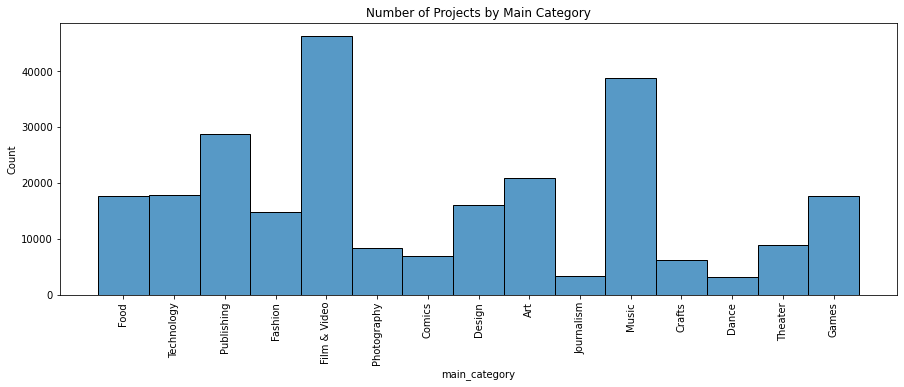

In [1545]:
# visualization: number of projects by main category

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Number of Projects by Main Category")
sns.histplot(x = df3["main_category"], kde = False)


<AxesSubplot:title={'center':'Number of Projects by Failure/Success'}, xlabel='state', ylabel='Count'>

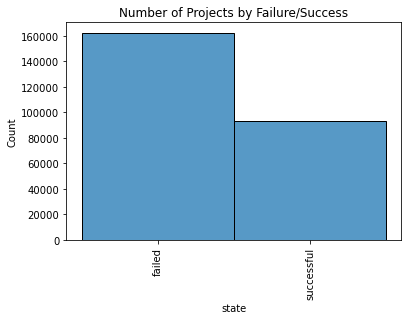

In [1546]:
# visualization: number of projects by state
plt.title("Number of Projects by Failure/Success")
plt.xticks(rotation = 90)
sns.histplot(x = df3["state"], kde = False)

<AxesSubplot:title={'center':'Number of Projects by Country'}, xlabel='country', ylabel='Count'>

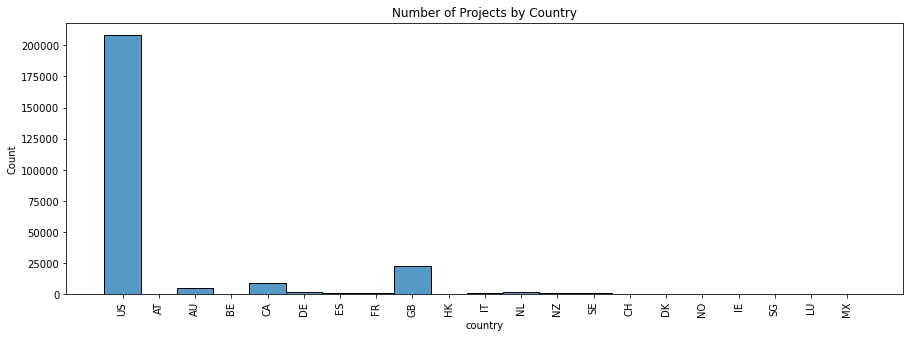

In [1547]:
# visualization: number of projects by country

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Number of Projects by Country")
sns.histplot(x = df3["country"], kde = False)

<AxesSubplot:title={'center':'Number of Failed/Successful Projects by Main Category'}, xlabel='main_category', ylabel='count'>

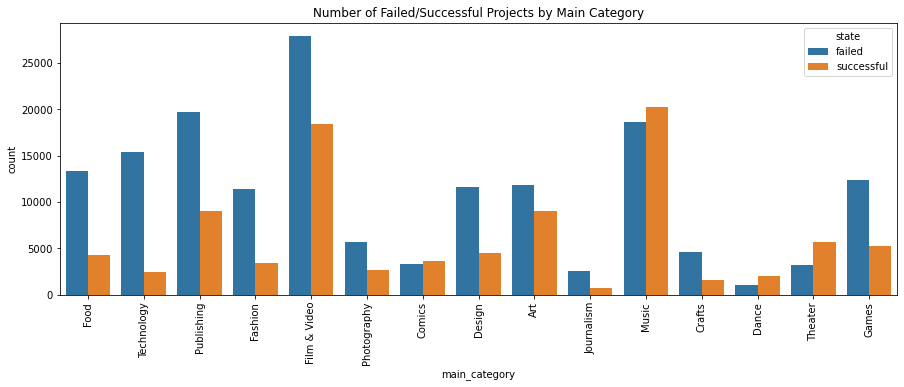

In [1548]:
# visualization: number of failed/successful projects by main category

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Number of Failed/Successful Projects by Main Category")
sns.countplot(x = df3["main_category"], hue = df3["state"])

## <font color=#6AA121>Part 4: Variable Relationships</font>

It's time to explore the relationships between variables and answer some of the critical questions for the project. Your dependent/outcome variable is <b>STATE</b> - this is the variable that captures if the project was successful or not. In addition to exploring the relationships between your other independent variables, you want to pay close attention to the relationship between your independent variables and state. Follow the steps below to explore the relationships between your variables. In addition, you are tasked with creating visualizations related to your results. Stylistic choices related to the visualizations is up to your group. Use the space below (double-click the cell to activate) to write a brief paragraph describing the steps you took to determine variable relationships. 

### <font color=#6AA121>Questions to Answer</font>
1.	How correlated are the numeric variables within this dataset? Create a correlation matrix to find out. Is anything highly correlated?
2.	What is the average amount of money pledged across each of the main categories? What about across the following: sub-category, country, currency, and state? Which main category is the most profitable? 
3.	What is the average number of backers across each of the main categories? What about across the following: sub-category, country, currency, and state? Which main category is the most popular?
4.	What percentage of projects succeed and fail across each of the main categories?
5.	Which of the main categories have the highest success rate (top 3)? Which of the sub-categories have the highest success rate (top 3)?
6.	What is the average duration of a campaign for projects that succeed? What is the average duration for projects that fail?
7.  What is the average funding goal of a campaign for projects that succeed? What is the average funding goal for projects that fail?


### <font color=#6AA121>Visualizations to Create</font> 
* Average Pledge by Main Category
* Average Num Backers by Main Category
* Average Pledge by State
* Average Num Backers by State
* Average Funding Goal by Main Category
* Average Funding Goal by State
* Average Percentage of Funding Collected by Main Category

***

### <font color=#6AA121>RELATIONSHIPS BETWEEN VARIABLES</font>

#### Start your paragraph here . . . Be sure to answer all questions in this space!

In [1549]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255455 entries, 0 to 281855
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   main_category          255455 non-null  object 
 1   category               255455 non-null  object 
 2   country                255455 non-null  object 
 3   currency               255455 non-null  object 
 4   length_days            255455 non-null  int64  
 5   goal                   255455 non-null  float64
 6   pledged                255455 non-null  float64
 7   backers                255455 non-null  int64  
 8   state                  255455 non-null  object 
 9   usd_pledged            255455 non-null  float64
 10  pct_funded             255455 non-null  float64
 11  avg_pledge_per_backer  223273 non-null  float64
 12  zscore_pct_funded      255455 non-null  float64
 13  zscore_usd_pledged     255455 non-null  float64
 14  zscore_length_days     255455 non-nu

In [1550]:
## average pledge across categoricial variables (groupby)
df3["usd_pledged"].groupby(df3["main_category"]).mean()

main_category
Art             1997.360462
Comics          2570.534248
Crafts           975.190867
Dance           3076.618001
Design          3354.558023
Fashion         2136.543387
Film & Video    3073.220146
Food            2645.230308
Games           2541.648571
Journalism      1312.453967
Music           2898.832922
Photography     1974.053745
Publishing      1812.615540
Technology      2161.891974
Theater         2926.569554
Name: usd_pledged, dtype: float64

<AxesSubplot:title={'center':'Average USD Pledged per Main Category'}, xlabel='main_category', ylabel='usd_pledged'>

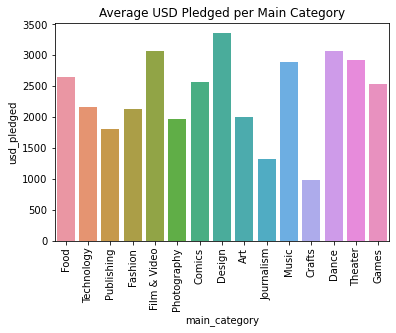

In [1551]:
# visualizing Average USD Pledged per Main Category
plt.title("Average USD Pledged per Main Category")
plt.xticks(rotation = 90)
sns.barplot(x = df3["main_category"], y = df3["usd_pledged"], ci = None)


In [1552]:
df3["usd_pledged"].groupby(df3["category"]).mean()

category
3D Printing           4243.485148
Academic              1133.105677
Accessories           2724.867686
Action                1244.742582
Animals               1175.238449
Animation             2548.994877
Anthologies           2737.113098
Apparel               1697.974536
Apps                   848.561063
Architecture          2455.616959
Art                   2160.058763
Art Books             3590.417649
Audio                  873.436594
Bacon                  690.047521
Blues                 2827.423421
Calendars             1537.241172
Camera Equipment      4526.270420
Candles                402.468948
Ceramics              3150.915252
Children's Books      2164.623711
Childrenswear         1747.461740
Chiptune              2428.863539
Civic Design          3357.492037
Classical Music       3831.146116
Comedy                2874.273682
Comic Books           2073.751347
Comics                2652.883533
Community Gardens     1479.156040
Conceptual Art        1432.089660
Cookb

In [1553]:
df3["usd_pledged"].groupby(df3["country"]).mean()

country
AT    2145.329735
AU    1548.986339
BE    1082.979793
CA    1808.310779
CH    1626.978210
DE    1638.095453
DK     652.026842
ES    1451.493658
FR    2357.345180
GB    2410.823653
HK     157.601902
IE    1840.914326
IT    1236.791064
LU    1864.686741
MX       8.136906
NL    2081.689048
NO     384.765900
NZ    1672.546481
SE     414.290251
SG     669.778114
US    2639.842944
Name: usd_pledged, dtype: float64

In [1554]:
df3["usd_pledged"].groupby(df3["currency"]).mean()

currency
AUD    1548.986339
CAD    1808.310779
CHF    1626.978210
DKK     652.026842
EUR    1770.880229
GBP    2410.823653
HKD     157.601902
MXN       8.136906
NOK     384.765900
NZD    1672.546481
SEK     414.290251
SGD     669.778114
USD    2639.842944
Name: usd_pledged, dtype: float64

In [1555]:
#average usd pledged by state

df3["usd_pledged"].groupby(df3["state"]).mean()

state
failed         908.893178
successful    5344.027738
Name: usd_pledged, dtype: float64

<AxesSubplot:title={'center':'Average USD Pledged per Success/Fail State'}, xlabel='state', ylabel='usd_pledged'>

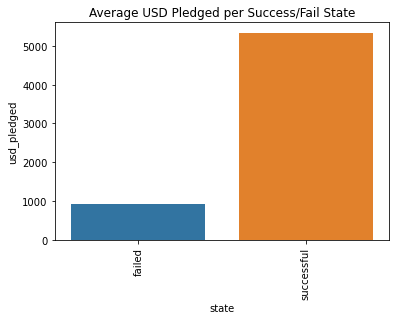

In [1556]:
# visualizing Average USD Pledged per State
plt.title("Average USD Pledged per Success/Fail State")
plt.xticks(rotation = 90)
sns.barplot(x = df3["state"], y = df3["usd_pledged"], ci = None)

In [1557]:
## average number of backers across categorical variables (groupby)
df3["backers"].groupby(df3["main_category"]).mean()

main_category
Art             29.397723
Comics          60.564702
Crafts          18.204121
Dance           40.732051
Design          46.885274
Fashion         25.391717
Film & Video    34.267026
Food            31.478817
Games           52.103960
Journalism      19.764014
Music           41.777683
Photography     26.573398
Publishing      30.583006
Technology      24.830719
Theater         39.789965
Name: backers, dtype: float64

In [1558]:
df3["backers"].groupby(df3["category"]).mean()

category
3D Printing           34.269841
Academic              19.054482
Accessories           34.143580
Action                12.386364
Animals               17.958115
Animation             32.019329
Anthologies           83.088889
Apparel               20.077290
Apps                  10.902368
Architecture          25.614379
Art                   30.629319
Art Books             54.813836
Audio                 16.335968
Bacon                 12.916129
Blues                 36.718232
Calendars             43.289474
Camera Equipment      47.111111
Candles                9.696370
Ceramics              38.290155
Children's Books      35.658102
Childrenswear         23.629139
Chiptune              61.640000
Civic Design          41.360825
Classical Music       45.839888
Comedy                33.943781
Comic Books           60.206278
Comics                57.034677
Community Gardens     19.804348
Conceptual Art        23.982544
Cookbooks             25.632047
Country & Folk        57.888494

In [1559]:
df3["backers"].groupby(df3["country"]).mean()

country
AT    23.869732
AU    25.414069
BE    19.650165
CA    28.252365
CH    20.395894
DE    25.453555
DK    15.298569
ES    24.748252
FR    34.442919
GB    32.838256
HK    11.548387
IE    32.077273
IT    19.590352
LU    33.156250
MX     9.250000
NL    23.927252
NO     9.865625
NZ    28.224781
SE    12.000000
SG    42.327586
US    36.847466
Name: backers, dtype: float64

In [1560]:
df3["backers"].groupby(df3["currency"]).mean()

currency
AUD    25.414069
CAD    28.252365
CHF    20.395894
DKK    15.298569
EUR    25.742547
GBP    32.838256
HKD    11.548387
MXN     9.250000
NOK     9.865625
NZD    28.224781
SEK    12.000000
SGD    42.327586
USD    36.847466
Name: backers, dtype: float64

In [1561]:
df3["backers"].groupby(df3["state"]).mean()

state
failed        13.089801
successful    74.434192
Name: backers, dtype: float64

<AxesSubplot:title={'center':'Average Number Backers per State'}, xlabel='state', ylabel='backers'>

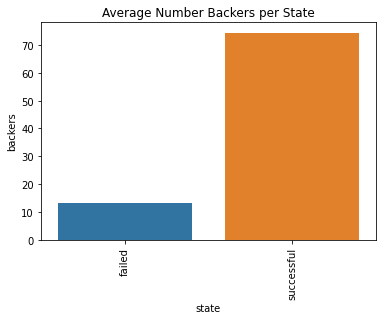

In [1562]:
# visualizing Average Number Backers per State
plt.title("Average Number Backers per State")
plt.xticks(rotation = 90)
sns.barplot(x = df3["state"], y = df3["backers"], ci = None)

<AxesSubplot:title={'center':'Average Funding Goal per Main Category'}, xlabel='main_category', ylabel='goal'>

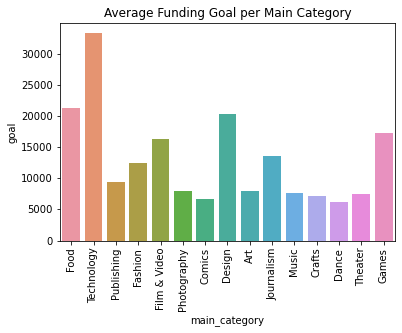

In [1563]:
# visualizing Average Funding Goal per Main Category
plt.title("Average Funding Goal per Main Category")
plt.xticks(rotation = 90)
sns.barplot(x = df3["main_category"], y = df3["goal"], ci = None)

<AxesSubplot:title={'center':'Average Funding Goal per State'}, xlabel='state', ylabel='goal'>

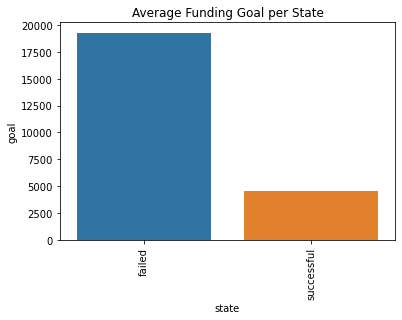

In [1564]:
# visualizing Average Funding Goal per State
plt.title("Average Funding Goal per State")
plt.xticks(rotation = 90)
sns.barplot(x = df3["state"], y = df3["goal"], ci = None)

<AxesSubplot:title={'center':'Avg Goal of Failed/Successful Projects by Main Category'}, xlabel='main_category', ylabel='goal'>

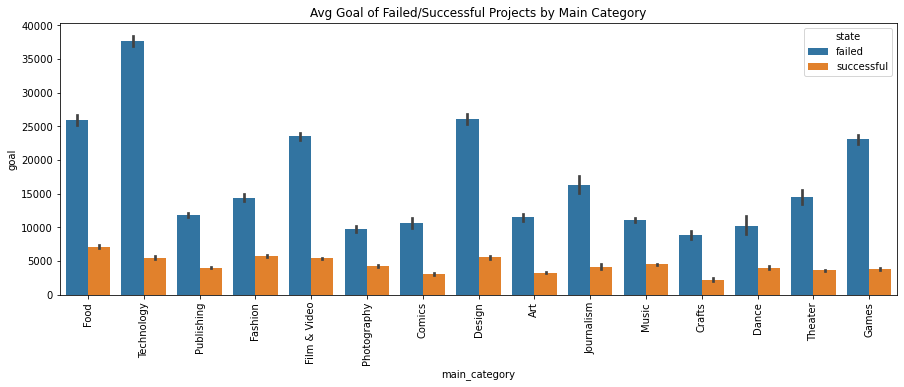

In [1565]:
# visualization: avg goal of failed/successful projects by main category

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Avg Goal of Failed/Successful Projects by Main Category")
sns.barplot(x = df3["main_category"], y = df3["goal"], hue = df3["state"])

<AxesSubplot:title={'center':'Average Percentage Funded per Main Category'}, xlabel='main_category', ylabel='pct_funded'>

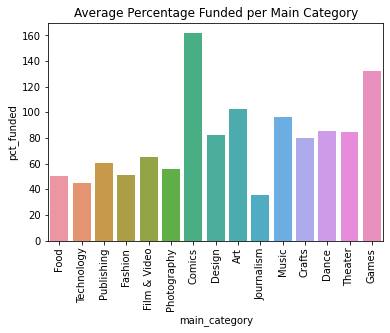

In [1566]:
# visualizing Average Percentage Funded per Main Category
plt.title("Average Percentage Funded per Main Category")
plt.xticks(rotation = 90)
sns.barplot(x = df3["main_category"], y = df3["pct_funded"], ci = None)

In [1567]:
## averages of all numeric variables grouped by state (groupby)
df3["length_days"].groupby(df3["state"]).mean()

#shorter projects more successful

state
failed        34.431721
successful    31.247128
Name: length_days, dtype: float64

In [1568]:
df3["usd_pledged"].groupby(df3["state"]).mean()

state
failed         908.893178
successful    5344.027738
Name: usd_pledged, dtype: float64

In [1569]:
df3["goal"].groupby(df3["state"]).mean()

#lower goal more successful

state
failed        19292.668982
successful     4524.782705
Name: goal, dtype: float64

<AxesSubplot:xlabel='state', ylabel='goal'>

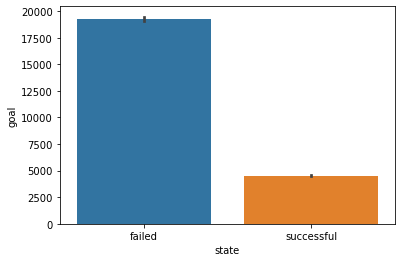

In [1570]:
#visualization of goal by state

sns.barplot(data = df3, x = "state", y = "goal")

In [1571]:
df3["backers"].groupby(df3["state"]).mean()

state
failed        13.089801
successful    74.434192
Name: backers, dtype: float64

In [1572]:
df3["pct_funded"].groupby(df3["state"]).mean()

state
failed          8.815714
successful    199.487527
Name: pct_funded, dtype: float64

In [1573]:
df3["avg_pledge_per_backer"].groupby(df3["state"]).mean()

state
failed              NaN
successful    79.447103
Name: avg_pledge_per_backer, dtype: float64

In [1574]:
df3.describe()

,length_days,goal,pledged,backers,usd_pledged,pct_funded,avg_pledge_per_backer,zscore_pct_funded,zscore_usd_pledged,zscore_length_days,zscore_goal,zscore_backers,zscore_pledged
count,255455.000000,255455.000000,255455.000000,255455.000000,255455.000000,255455.000000,2.232730e+05,2.554550e+05,2.554550e+05,255455.000000,255455.000000,255455.000000,255455.000000
mean,33.272948,13919.101953,2614.332991,35.411086,2522.698457,78.195160,inf,1.078983e-02,8.066917e-02,0.722176,0.199706,0.486872,0.472834
std,11.758320,29649.745813,4471.019643,52.931812,4447.549886,739.976193,NaN,2.669576e-02,2.806996e-02,0.685540,0.245819,0.399614,0.360061
min,1.000000,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.893195e-08,3.859857e-07,0.029036,0.000174,0.005743,0.000003
25%,30.000000,1800.000000,35.000000,2.000000,29.862143,0.555556,2.258333e+01,8.140227e-03,7.013241e-02,0.283084,0.121222,0.298934,0.322042
50%,30.000000,5000.000000,575.000000,12.000000,520.000000,14.000000,4.500000e+01,1.152322e-02,9.266324e-02,0.283084,0.177523,0.463363,0.474774
75%,35.000000,12000.000000,3125.000000,47.000000,3000.000000,105.285714,7.781818e+01,1.198459e-02,9.725916e-02,0.987156,0.203589,0.522001,0.501419
max,68.000000,308124.000000,27462.000000,300.000000,44262.811260,81100.000000,inf,2.981383e+00,4.075841e-01,2.934858,2.998539,2.996291,2.999572


# BINNING

In [1575]:
# create bins for number of backers

bins = [0, 5, 20, 60, 100, 150000]
bin_labels = ["0-4", "5-19", "20-59", "60-99", "100+"]

df3["backers_group"] = pd.cut(df3["backers"], bins, labels = bin_labels)

df3.head()

,main_category,category,country,currency,length_days,goal,pledged,backers,state,usd_pledged,pct_funded,avg_pledge_per_backer,zscore_pct_funded,zscore_usd_pledged,zscore_length_days,zscore_goal,zscore_backers,zscore_pledged,backers_group
0,Food,Cookbooks,US,USD,29,13730.0,3984.0,46,failed,3984.000000,29.016752,86.608696,0.010932,0.052027,0.367767,0.070863,0.017470,0.006372,20-59
1,Technology,3D Printing,AT,EUR,35,75000.0,7386.0,31,failed,1561.784015,9.848000,50.380130,0.011640,0.079666,0.140329,0.567948,0.158444,0.440091,20-59
2,Technology,3D Printing,AT,EUR,30,15000.0,3834.0,46,failed,4152.402045,25.560000,90.269610,0.011060,0.050105,0.283084,0.057622,0.017470,0.012752,20-59
3,Technology,3D Printing,AT,EUR,30,20000.0,18.0,6,failed,19.435528,0.090000,3.239255,0.012000,0.097266,0.283084,0.005491,0.451635,0.499252,5-19
4,Technology,3D Printing,AT,EUR,40,20000.0,2598.0,29,failed,2908.076574,12.990000,100.278503,0.011524,0.064304,0.563743,0.005491,0.181900,0.170329,20-59


In [1576]:
# create bins for usd pledged

bins = [0, 100, 1000, 5000, 100000, 300000]
bin_labels = ["0-99", "100-999", "1,000-4,999", "5,000-99,999", "100,000-300,000"]

df3["usd_pledged_group"] = pd.cut(df3["usd_pledged"], bins, labels = bin_labels)

df3.head()

,main_category,category,country,currency,length_days,goal,pledged,backers,state,usd_pledged,pct_funded,avg_pledge_per_backer,zscore_pct_funded,zscore_usd_pledged,zscore_length_days,zscore_goal,zscore_backers,zscore_pledged,backers_group,usd_pledged_group
0,Food,Cookbooks,US,USD,29,13730.0,3984.0,46,failed,3984.000000,29.016752,86.608696,0.010932,0.052027,0.367767,0.070863,0.017470,0.006372,20-59,"1,000-4,999"
1,Technology,3D Printing,AT,EUR,35,75000.0,7386.0,31,failed,1561.784015,9.848000,50.380130,0.011640,0.079666,0.140329,0.567948,0.158444,0.440091,20-59,"1,000-4,999"
2,Technology,3D Printing,AT,EUR,30,15000.0,3834.0,46,failed,4152.402045,25.560000,90.269610,0.011060,0.050105,0.283084,0.057622,0.017470,0.012752,20-59,"1,000-4,999"
3,Technology,3D Printing,AT,EUR,30,20000.0,18.0,6,failed,19.435528,0.090000,3.239255,0.012000,0.097266,0.283084,0.005491,0.451635,0.499252,5-19,0-99
4,Technology,3D Printing,AT,EUR,40,20000.0,2598.0,29,failed,2908.076574,12.990000,100.278503,0.011524,0.064304,0.563743,0.005491,0.181900,0.170329,20-59,"1,000-4,999"


In [1577]:
# create bins for pct_funded

bins = [0, 50, 90, 100, 110, 550000]
bin_labels = ["0-49", "50-89", "90-99", "100-109", "110+"]

df3["pct_funded_group"] = pd.cut(df3["pct_funded"], bins, labels = bin_labels)

df3.head()

,main_category,category,country,currency,length_days,goal,pledged,backers,state,usd_pledged,...,avg_pledge_per_backer,zscore_pct_funded,zscore_usd_pledged,zscore_length_days,zscore_goal,zscore_backers,zscore_pledged,backers_group,usd_pledged_group,pct_funded_group
0,Food,Cookbooks,US,USD,29,13730.0,3984.0,46,failed,3984.000000,...,86.608696,0.010932,0.052027,0.367767,0.070863,0.017470,0.006372,20-59,"1,000-4,999",0-49
1,Technology,3D Printing,AT,EUR,35,75000.0,7386.0,31,failed,1561.784015,...,50.380130,0.011640,0.079666,0.140329,0.567948,0.158444,0.440091,20-59,"1,000-4,999",0-49
2,Technology,3D Printing,AT,EUR,30,15000.0,3834.0,46,failed,4152.402045,...,90.269610,0.011060,0.050105,0.283084,0.057622,0.017470,0.012752,20-59,"1,000-4,999",0-49
3,Technology,3D Printing,AT,EUR,30,20000.0,18.0,6,failed,19.435528,...,3.239255,0.012000,0.097266,0.283084,0.005491,0.451635,0.499252,5-19,0-99,0-49
4,Technology,3D Printing,AT,EUR,40,20000.0,2598.0,29,failed,2908.076574,...,100.278503,0.011524,0.064304,0.563743,0.005491,0.181900,0.170329,20-59,"1,000-4,999",0-49


In [1578]:
# create bins for length_days

bins = [0, 15, 20, 30, 60, 101]
bin_labels = ["0-14", "15-19", "20-29", "30-59", "60-100"]

df3["length_days_group"] = pd.cut(df3["length_days"], bins, labels = bin_labels)

df3.head()

,main_category,category,country,currency,length_days,goal,pledged,backers,state,usd_pledged,...,zscore_pct_funded,zscore_usd_pledged,zscore_length_days,zscore_goal,zscore_backers,zscore_pledged,backers_group,usd_pledged_group,pct_funded_group,length_days_group
0,Food,Cookbooks,US,USD,29,13730.0,3984.0,46,failed,3984.000000,...,0.010932,0.052027,0.367767,0.070863,0.017470,0.006372,20-59,"1,000-4,999",0-49,20-29
1,Technology,3D Printing,AT,EUR,35,75000.0,7386.0,31,failed,1561.784015,...,0.011640,0.079666,0.140329,0.567948,0.158444,0.440091,20-59,"1,000-4,999",0-49,30-59
2,Technology,3D Printing,AT,EUR,30,15000.0,3834.0,46,failed,4152.402045,...,0.011060,0.050105,0.283084,0.057622,0.017470,0.012752,20-59,"1,000-4,999",0-49,20-29
3,Technology,3D Printing,AT,EUR,30,20000.0,18.0,6,failed,19.435528,...,0.012000,0.097266,0.283084,0.005491,0.451635,0.499252,5-19,0-99,0-49,20-29
4,Technology,3D Printing,AT,EUR,40,20000.0,2598.0,29,failed,2908.076574,...,0.011524,0.064304,0.563743,0.005491,0.181900,0.170329,20-59,"1,000-4,999",0-49,30-59


In [1579]:
# create bins for goal

bins = [0, 2000, 5000, 15000, 30000, 10000000]
bin_labels = ["0-1,999", "2,000-4,999", "5,000-14,999", "15,000-29,999", "30,000+"]

df3["goal_group"] = pd.cut(df3["goal"], bins, labels = bin_labels)

df3.head()

,main_category,category,country,currency,length_days,goal,pledged,backers,state,usd_pledged,...,zscore_usd_pledged,zscore_length_days,zscore_goal,zscore_backers,zscore_pledged,backers_group,usd_pledged_group,pct_funded_group,length_days_group,goal_group
0,Food,Cookbooks,US,USD,29,13730.0,3984.0,46,failed,3984.000000,...,0.052027,0.367767,0.070863,0.017470,0.006372,20-59,"1,000-4,999",0-49,20-29,"5,000-14,999"
1,Technology,3D Printing,AT,EUR,35,75000.0,7386.0,31,failed,1561.784015,...,0.079666,0.140329,0.567948,0.158444,0.440091,20-59,"1,000-4,999",0-49,30-59,"30,000+"
2,Technology,3D Printing,AT,EUR,30,15000.0,3834.0,46,failed,4152.402045,...,0.050105,0.283084,0.057622,0.017470,0.012752,20-59,"1,000-4,999",0-49,20-29,"5,000-14,999"
3,Technology,3D Printing,AT,EUR,30,20000.0,18.0,6,failed,19.435528,...,0.097266,0.283084,0.005491,0.451635,0.499252,5-19,0-99,0-49,20-29,"15,000-29,999"
4,Technology,3D Printing,AT,EUR,40,20000.0,2598.0,29,failed,2908.076574,...,0.064304,0.563743,0.005491,0.181900,0.170329,20-59,"1,000-4,999",0-49,30-59,"15,000-29,999"


# Visuals with Bins

<AxesSubplot:title={'center':'USD Pledged by Main Category and Pct Funded'}, xlabel='main_category', ylabel='usd_pledged'>

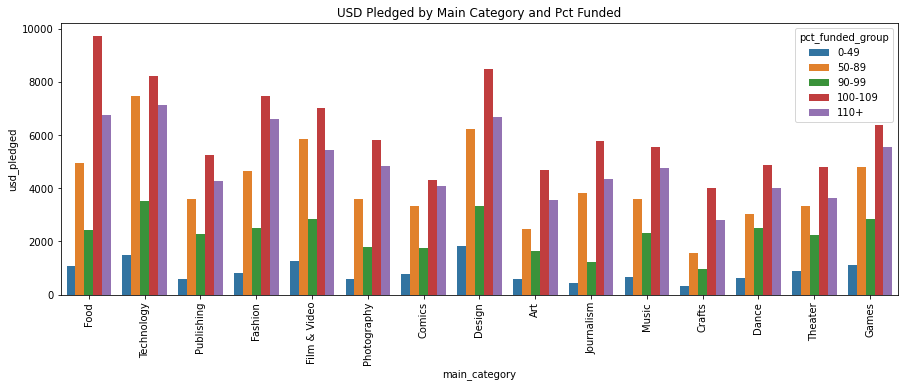

In [1580]:
# average number of backers and pledges by main category 
# include the variable "pct_funded" to get a better picture of the projects that met/exceeded their goal

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("USD Pledged by Main Category and Pct Funded")
sns.barplot(x=df3["main_category"], y = df3["usd_pledged"], hue = df3["pct_funded_group"], ci=None)

<AxesSubplot:title={'center':'USD Pledged by Main Category and Backers'}, xlabel='main_category', ylabel='usd_pledged'>

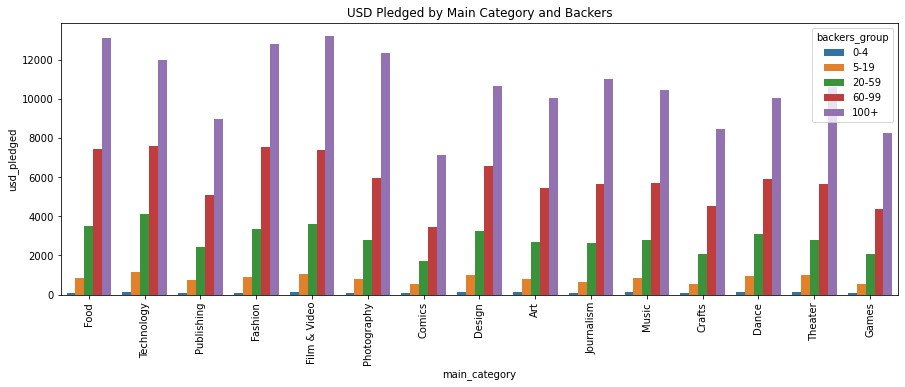

In [1581]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("USD Pledged by Main Category and Backers")
sns.barplot(x=df3["main_category"], y = df3["usd_pledged"], hue = df3["backers_group"], ci=None)

<AxesSubplot:title={'center':'Pct Funded by Main Category and USD Pledged Group'}, xlabel='main_category', ylabel='pct_funded'>

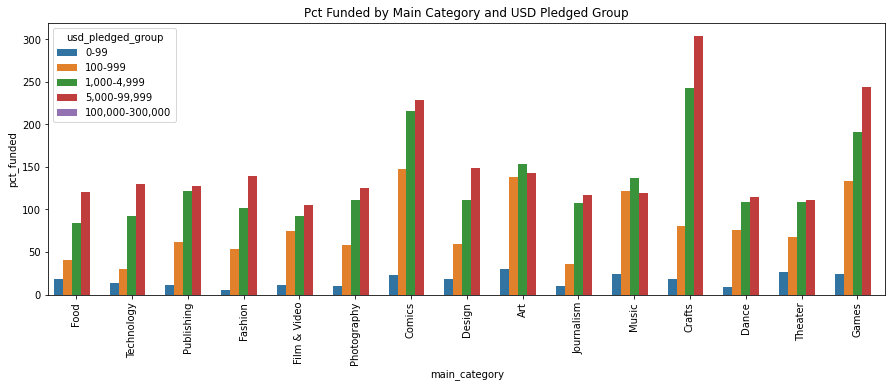

In [1582]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Pct Funded by Main Category and USD Pledged Group")
sns.barplot(x=df3["main_category"], y = df3["pct_funded"], hue = df3["usd_pledged_group"], ci=None)

<AxesSubplot:title={'center':'USD Pledged by Main Category and Pct Funded'}, xlabel='pct_funded_group', ylabel='usd_pledged'>

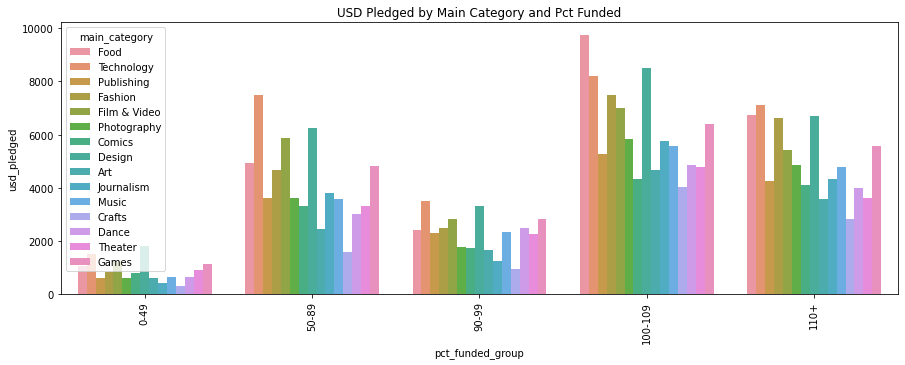

In [1583]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("USD Pledged by Main Category and Pct Funded")
sns.barplot(x=df3["pct_funded_group"], y = df3["usd_pledged"], hue = df3["main_category"], ci=None)

<AxesSubplot:title={'center':'Average Goal by Main Category and State'}, xlabel='main_category', ylabel='goal'>

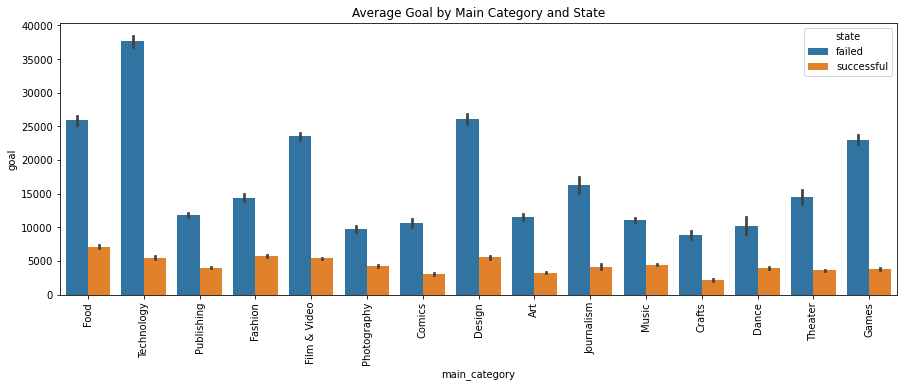

In [1584]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Average Goal by Main Category and State")
sns.barplot(data = df3, x="main_category", y= "goal", hue = "state")

# Creating Datasets of Sub-Groups (Numerical Groupings)

In [1585]:
df3["state_binary"]=np.where(df3["state"]=="successful", 1, 0)

In [1586]:
# Dataset of successful campaigns

df3_successful = df3.copy()
df3_successful["Success"] = np.where(df3["state"]=="successful", "Y", "N")
df3_successful.head()

,main_category,category,country,currency,length_days,goal,pledged,backers,state,usd_pledged,...,zscore_goal,zscore_backers,zscore_pledged,backers_group,usd_pledged_group,pct_funded_group,length_days_group,goal_group,state_binary,Success
0,Food,Cookbooks,US,USD,29,13730.0,3984.0,46,failed,3984.000000,...,0.070863,0.017470,0.006372,20-59,"1,000-4,999",0-49,20-29,"5,000-14,999",0,N
1,Technology,3D Printing,AT,EUR,35,75000.0,7386.0,31,failed,1561.784015,...,0.567948,0.158444,0.440091,20-59,"1,000-4,999",0-49,30-59,"30,000+",0,N
2,Technology,3D Printing,AT,EUR,30,15000.0,3834.0,46,failed,4152.402045,...,0.057622,0.017470,0.012752,20-59,"1,000-4,999",0-49,20-29,"5,000-14,999",0,N
3,Technology,3D Printing,AT,EUR,30,20000.0,18.0,6,failed,19.435528,...,0.005491,0.451635,0.499252,5-19,0-99,0-49,20-29,"15,000-29,999",0,N
4,Technology,3D Printing,AT,EUR,40,20000.0,2598.0,29,failed,2908.076574,...,0.005491,0.181900,0.170329,20-59,"1,000-4,999",0-49,30-59,"15,000-29,999",0,N


In [1587]:
df3_successful.drop(df3_successful.loc[df3_successful["Success"]=="N"].index, inplace = True)
df3_successful.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92952 entries, 10 to 281855
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   main_category          92952 non-null  object  
 1   category               92952 non-null  object  
 2   country                92952 non-null  object  
 3   currency               92952 non-null  object  
 4   length_days            92952 non-null  int64   
 5   goal                   92952 non-null  float64 
 6   pledged                92952 non-null  float64 
 7   backers                92952 non-null  int64   
 8   state                  92952 non-null  object  
 9   usd_pledged            92952 non-null  float64 
 10  pct_funded             92952 non-null  float64 
 11  avg_pledge_per_backer  92952 non-null  float64 
 12  zscore_pct_funded      92952 non-null  float64 
 13  zscore_usd_pledged     92952 non-null  float64 
 14  zscore_length_days     92952 non-nul

In [1588]:
# Dataset of failed campaigns

df3_failed = df3.copy()
df3_failed["Success"] = np.where(df3["state"]=="successful", "Y", "N")
df3_failed.head()

,main_category,category,country,currency,length_days,goal,pledged,backers,state,usd_pledged,...,zscore_goal,zscore_backers,zscore_pledged,backers_group,usd_pledged_group,pct_funded_group,length_days_group,goal_group,state_binary,Success
0,Food,Cookbooks,US,USD,29,13730.0,3984.0,46,failed,3984.000000,...,0.070863,0.017470,0.006372,20-59,"1,000-4,999",0-49,20-29,"5,000-14,999",0,N
1,Technology,3D Printing,AT,EUR,35,75000.0,7386.0,31,failed,1561.784015,...,0.567948,0.158444,0.440091,20-59,"1,000-4,999",0-49,30-59,"30,000+",0,N
2,Technology,3D Printing,AT,EUR,30,15000.0,3834.0,46,failed,4152.402045,...,0.057622,0.017470,0.012752,20-59,"1,000-4,999",0-49,20-29,"5,000-14,999",0,N
3,Technology,3D Printing,AT,EUR,30,20000.0,18.0,6,failed,19.435528,...,0.005491,0.451635,0.499252,5-19,0-99,0-49,20-29,"15,000-29,999",0,N
4,Technology,3D Printing,AT,EUR,40,20000.0,2598.0,29,failed,2908.076574,...,0.005491,0.181900,0.170329,20-59,"1,000-4,999",0-49,30-59,"15,000-29,999",0,N


In [1589]:
df3_failed.drop(df3_failed.loc[df3_failed["Success"]=="Y"].index, inplace = True)
df3_failed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162503 entries, 0 to 281853
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   main_category          162503 non-null  object  
 1   category               162503 non-null  object  
 2   country                162503 non-null  object  
 3   currency               162503 non-null  object  
 4   length_days            162503 non-null  int64   
 5   goal                   162503 non-null  float64 
 6   pledged                162503 non-null  float64 
 7   backers                162503 non-null  int64   
 8   state                  162503 non-null  object  
 9   usd_pledged            162503 non-null  float64 
 10  pct_funded             162503 non-null  float64 
 11  avg_pledge_per_backer  130321 non-null  float64 
 12  zscore_pct_funded      162503 non-null  float64 
 13  zscore_usd_pledged     162503 non-null  float64 
 14  zscore_length_days  

In [1590]:
#df3.to_excel("Kickstarter_df3.xlsx")

### Backers Groups: 
- df3_backers_1: 0-4     68,698 rows
- df3_backers_2: 5-19    51,506 rows
- df3_backers_3: 20-59   54,341 rows
- df3_backers_4: 60-99   23,892 rows
- df3_backers_5: 100+    43,736 rows

In [1591]:
df3_backers_1 = df3.copy()
df3_backers_1["Backers_0-4"] = np.where(df3["backers_group"]=="0-4", "Y", "N")
df3_backers_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255455 entries, 0 to 281855
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   main_category          255455 non-null  object  
 1   category               255455 non-null  object  
 2   country                255455 non-null  object  
 3   currency               255455 non-null  object  
 4   length_days            255455 non-null  int64   
 5   goal                   255455 non-null  float64 
 6   pledged                255455 non-null  float64 
 7   backers                255455 non-null  int64   
 8   state                  255455 non-null  object  
 9   usd_pledged            255455 non-null  float64 
 10  pct_funded             255455 non-null  float64 
 11  avg_pledge_per_backer  223273 non-null  float64 
 12  zscore_pct_funded      255455 non-null  float64 
 13  zscore_usd_pledged     255455 non-null  float64 
 14  zscore_length_days  

In [1592]:
df3_backers_1.drop(df3_backers_1.loc[df3_backers_1["Backers_0-4"]=="N"].index, inplace = True)
df3_backers_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67620 entries, 6 to 281851
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   main_category          67620 non-null  object  
 1   category               67620 non-null  object  
 2   country                67620 non-null  object  
 3   currency               67620 non-null  object  
 4   length_days            67620 non-null  int64   
 5   goal                   67620 non-null  float64 
 6   pledged                67620 non-null  float64 
 7   backers                67620 non-null  int64   
 8   state                  67620 non-null  object  
 9   usd_pledged            67620 non-null  float64 
 10  pct_funded             67620 non-null  float64 
 11  avg_pledge_per_backer  67620 non-null  float64 
 12  zscore_pct_funded      67620 non-null  float64 
 13  zscore_usd_pledged     67620 non-null  float64 
 14  zscore_length_days     67620 non-null

In [1593]:
df3_backers_2 = df3.copy()
df3_backers_2["Backers_5-19"] = np.where(df3_backers_2["backers_group"]=="5-19", "Y", "N")

In [1594]:
df3_backers_2.drop(df3_backers_2.loc[df3_backers_2["Backers_5-19"]=="N"].index, inplace = True)
df3_backers_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51102 entries, 3 to 281853
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   main_category          51102 non-null  object  
 1   category               51102 non-null  object  
 2   country                51102 non-null  object  
 3   currency               51102 non-null  object  
 4   length_days            51102 non-null  int64   
 5   goal                   51102 non-null  float64 
 6   pledged                51102 non-null  float64 
 7   backers                51102 non-null  int64   
 8   state                  51102 non-null  object  
 9   usd_pledged            51102 non-null  float64 
 10  pct_funded             51102 non-null  float64 
 11  avg_pledge_per_backer  51102 non-null  float64 
 12  zscore_pct_funded      51102 non-null  float64 
 13  zscore_usd_pledged     51102 non-null  float64 
 14  zscore_length_days     51102 non-null

In [1595]:
df3_backers_3 = df3.copy()
df3_backers_3["Backers_20-59"] = np.where(df3_backers_3["backers_group"]=="20-59", "Y", "N")

In [1596]:
df3_backers_3.drop(df3_backers_3.loc[df3_backers_3["Backers_20-59"]=="N"].index, inplace = True)
df3_backers_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53909 entries, 0 to 281855
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   main_category          53909 non-null  object  
 1   category               53909 non-null  object  
 2   country                53909 non-null  object  
 3   currency               53909 non-null  object  
 4   length_days            53909 non-null  int64   
 5   goal                   53909 non-null  float64 
 6   pledged                53909 non-null  float64 
 7   backers                53909 non-null  int64   
 8   state                  53909 non-null  object  
 9   usd_pledged            53909 non-null  float64 
 10  pct_funded             53909 non-null  float64 
 11  avg_pledge_per_backer  53909 non-null  float64 
 12  zscore_pct_funded      53909 non-null  float64 
 13  zscore_usd_pledged     53909 non-null  float64 
 14  zscore_length_days     53909 non-null

In [1597]:
df3_backers_4 = df3.copy()
df3_backers_4["Backers_60-99"] = np.where(df3_backers_4["backers_group"]=="60-99", "Y", "N")

In [1598]:
df3_backers_4.drop(df3_backers_4.loc[df3_backers_4["Backers_60-99"]=="N"].index, inplace = True)
df3_backers_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23372 entries, 10 to 281846
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   main_category          23372 non-null  object  
 1   category               23372 non-null  object  
 2   country                23372 non-null  object  
 3   currency               23372 non-null  object  
 4   length_days            23372 non-null  int64   
 5   goal                   23372 non-null  float64 
 6   pledged                23372 non-null  float64 
 7   backers                23372 non-null  int64   
 8   state                  23372 non-null  object  
 9   usd_pledged            23372 non-null  float64 
 10  pct_funded             23372 non-null  float64 
 11  avg_pledge_per_backer  23372 non-null  float64 
 12  zscore_pct_funded      23372 non-null  float64 
 13  zscore_usd_pledged     23372 non-null  float64 
 14  zscore_length_days     23372 non-nul

In [1599]:
df3_backers_5 = df3.copy()
df3_backers_5["Backers_100+"] = np.where(df3_backers_5["backers_group"]=="100+", "Y", "N")

In [1600]:
df3_backers_5.drop(df3_backers_5.loc[df3_backers_5["Backers_100+"]=="N"].index, inplace = True)
df3_backers_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27252 entries, 44 to 281854
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   main_category          27252 non-null  object  
 1   category               27252 non-null  object  
 2   country                27252 non-null  object  
 3   currency               27252 non-null  object  
 4   length_days            27252 non-null  int64   
 5   goal                   27252 non-null  float64 
 6   pledged                27252 non-null  float64 
 7   backers                27252 non-null  int64   
 8   state                  27252 non-null  object  
 9   usd_pledged            27252 non-null  float64 
 10  pct_funded             27252 non-null  float64 
 11  avg_pledge_per_backer  27252 non-null  float64 
 12  zscore_pct_funded      27252 non-null  float64 
 13  zscore_usd_pledged     27252 non-null  float64 
 14  zscore_length_days     27252 non-nul

### USD Pledged Groups: 
- df3_usd_pledged_1: 0-99               50,919 rows
- df3_usd_pledged_2: 100-999            62,956 rows
- df3_usd_pledged_3: 1,000-4,999        64,278 rows
- df3_usd_pledged_4: 5,000-99,999       58,575 rows
- df3_usd_pledged_5: 100,000-300,000    3,219 rows

In [1601]:
df3_usd_pledged_1 = df3.copy()
df3_usd_pledged_1["USD_Pledged_0-99"] = np.where(df3_usd_pledged_1["usd_pledged_group"]=="0-99", "Y", "N")

In [1602]:
df3_usd_pledged_1.drop(df3_usd_pledged_1.loc[df3_usd_pledged_1["USD_Pledged_0-99"]=="N"].index, inplace = True)
df3_usd_pledged_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50126 entries, 3 to 281832
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   main_category          50126 non-null  object  
 1   category               50126 non-null  object  
 2   country                50126 non-null  object  
 3   currency               50126 non-null  object  
 4   length_days            50126 non-null  int64   
 5   goal                   50126 non-null  float64 
 6   pledged                50126 non-null  float64 
 7   backers                50126 non-null  int64   
 8   state                  50126 non-null  object  
 9   usd_pledged            50126 non-null  float64 
 10  pct_funded             50126 non-null  float64 
 11  avg_pledge_per_backer  50126 non-null  float64 
 12  zscore_pct_funded      50126 non-null  float64 
 13  zscore_usd_pledged     50126 non-null  float64 
 14  zscore_length_days     50126 non-null

In [1603]:
df3_usd_pledged_2 = df3.copy()
df3_usd_pledged_2["USD_Pledged_100-999"] = np.where(df3_usd_pledged_2["usd_pledged_group"]=="100-999", "Y", "N")

In [1604]:
df3_usd_pledged_2.drop(df3_usd_pledged_2.loc[df3_usd_pledged_2["USD_Pledged_100-999"]=="N"].index, inplace = True)
df3_usd_pledged_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62342 entries, 5 to 281855
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   main_category          62342 non-null  object  
 1   category               62342 non-null  object  
 2   country                62342 non-null  object  
 3   currency               62342 non-null  object  
 4   length_days            62342 non-null  int64   
 5   goal                   62342 non-null  float64 
 6   pledged                62342 non-null  float64 
 7   backers                62342 non-null  int64   
 8   state                  62342 non-null  object  
 9   usd_pledged            62342 non-null  float64 
 10  pct_funded             62342 non-null  float64 
 11  avg_pledge_per_backer  62342 non-null  float64 
 12  zscore_pct_funded      62342 non-null  float64 
 13  zscore_usd_pledged     62342 non-null  float64 
 14  zscore_length_days     62342 non-null

In [1605]:
df3_usd_pledged_3 = df3.copy()
df3_usd_pledged_3["USD_Pledged_1,000-4,999"] = np.where(df3_usd_pledged_3["usd_pledged_group"]=="1,000-4,999", "Y", "N")

In [1606]:
df3_usd_pledged_3.drop(df3_usd_pledged_3.loc[df3_usd_pledged_3["USD_Pledged_1,000-4,999"]=="N"].index, inplace = True)
df3_usd_pledged_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63395 entries, 0 to 281846
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   main_category            63395 non-null  object  
 1   category                 63395 non-null  object  
 2   country                  63395 non-null  object  
 3   currency                 63395 non-null  object  
 4   length_days              63395 non-null  int64   
 5   goal                     63395 non-null  float64 
 6   pledged                  63395 non-null  float64 
 7   backers                  63395 non-null  int64   
 8   state                    63395 non-null  object  
 9   usd_pledged              63395 non-null  float64 
 10  pct_funded               63395 non-null  float64 
 11  avg_pledge_per_backer    63395 non-null  float64 
 12  zscore_pct_funded        63395 non-null  float64 
 13  zscore_usd_pledged       63395 non-null  float64 
 14  zscor

In [1607]:
df3_usd_pledged_4 = df3.copy()
df3_usd_pledged_4["USD_Pledged_5,000-99,999"] = np.where(df3_usd_pledged_4["usd_pledged_group"]=="5,000-99,999", "Y", "N")

In [1608]:
df3_usd_pledged_4.drop(df3_usd_pledged_4.loc[df3_usd_pledged_4["USD_Pledged_5,000-99,999"]=="N"].index, inplace = True)
df3_usd_pledged_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43291 entries, 7 to 281854
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   main_category             43291 non-null  object  
 1   category                  43291 non-null  object  
 2   country                   43291 non-null  object  
 3   currency                  43291 non-null  object  
 4   length_days               43291 non-null  int64   
 5   goal                      43291 non-null  float64 
 6   pledged                   43291 non-null  float64 
 7   backers                   43291 non-null  int64   
 8   state                     43291 non-null  object  
 9   usd_pledged               43291 non-null  float64 
 10  pct_funded                43291 non-null  float64 
 11  avg_pledge_per_backer     43291 non-null  float64 
 12  zscore_pct_funded         43291 non-null  float64 
 13  zscore_usd_pledged        43291 non-null  flo

In [1609]:
df3_usd_pledged_5 = df3.copy()
df3_usd_pledged_5["USD_Pledged_100,000-300,000"] = np.where(df3_usd_pledged_5["usd_pledged_group"]=="100,000-300,000", "Y", "N")

In [1610]:
df3_usd_pledged_5.drop(df3_usd_pledged_5.loc[df3_usd_pledged_5["USD_Pledged_100,000-300,000"]=="N"].index, inplace = True)
df3_usd_pledged_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   main_category                0 non-null      object  
 1   category                     0 non-null      object  
 2   country                      0 non-null      object  
 3   currency                     0 non-null      object  
 4   length_days                  0 non-null      int64   
 5   goal                         0 non-null      float64 
 6   pledged                      0 non-null      float64 
 7   backers                      0 non-null      int64   
 8   state                        0 non-null      object  
 9   usd_pledged                  0 non-null      float64 
 10  pct_funded                   0 non-null      float64 
 11  avg_pledge_per_backer        0 non-null      float64 
 12  zscore_pct_funded            0 non-null      float64 
 13  zscore_usd_pledge

In [1611]:
#df3_backers_1.to_excel("df3_backers_1.xlsx")
#df3_backers_2.to_excel("df3_backers_2.xlsx")
#df3_backers_3.to_excel("df3_backers_3.xlsx")
#df3_backers_4.to_excel("df3_backers_4.xlsx")
#df3_backers_5.to_excel("df3_backers_5.xlsx")

In [1612]:
#df3.to_excel("Kickstarter_df3.xlsx")

In [1613]:
#df3_usd_pledged_1.to_excel("df3_usd_pledged_1.xlsx")
#df3_usd_pledged_2.to_excel("df3_usd_pledged_2.xlsx")
#df3_usd_pledged_3.to_excel("df3_usd_pledged_3.xlsx")
#df3_usd_pledged_4.to_excel("df3_usd_pledged_4.xlsx")
#df3_usd_pledged_5.to_excel("df3_usd_pledged_5.xlsx")

### Pct Funded Groups: 
- df3_pct_funded_1: 0-49           128,844 rows
- df3_pct_funded_2: 50-89            7,557 rows
- df3_pct_funded_3: 90-99            3,925 rows
- df3_pct_funded_4: 100-109         34,727 rows
- df3_pct_funded_5: 110+            62,894 rows

In [1614]:
df3_pct_funded_1 = df3.copy()
df3_pct_funded_1["Pct_Funded_0-49"] = np.where(df3_pct_funded_1["pct_funded_group"]=="0-49", "Y", "N")

In [1615]:
df3_pct_funded_1.drop(df3_pct_funded_1.loc[df3_pct_funded_1["Pct_Funded_0-49"]=="N"].index, inplace = True)
df3_pct_funded_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125358 entries, 0 to 281853
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   main_category          125358 non-null  object  
 1   category               125358 non-null  object  
 2   country                125358 non-null  object  
 3   currency               125358 non-null  object  
 4   length_days            125358 non-null  int64   
 5   goal                   125358 non-null  float64 
 6   pledged                125358 non-null  float64 
 7   backers                125358 non-null  int64   
 8   state                  125358 non-null  object  
 9   usd_pledged            125358 non-null  float64 
 10  pct_funded             125358 non-null  float64 
 11  avg_pledge_per_backer  125357 non-null  float64 
 12  zscore_pct_funded      125358 non-null  float64 
 13  zscore_usd_pledged     125358 non-null  float64 
 14  zscore_length_days  

In [1616]:
df3_pct_funded_2 = df3.copy()
df3_pct_funded_2["Pct_Funded_50-89"] = np.where(df3_pct_funded_2["pct_funded_group"]=="50-89", "Y", "N")

In [1617]:
df3_pct_funded_2.drop(df3_pct_funded_2.loc[df3_pct_funded_2["Pct_Funded_50-89"]=="N"].index, inplace = True)
df3_pct_funded_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4832 entries, 50 to 281750
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   main_category          4832 non-null   object  
 1   category               4832 non-null   object  
 2   country                4832 non-null   object  
 3   currency               4832 non-null   object  
 4   length_days            4832 non-null   int64   
 5   goal                   4832 non-null   float64 
 6   pledged                4832 non-null   float64 
 7   backers                4832 non-null   int64   
 8   state                  4832 non-null   object  
 9   usd_pledged            4832 non-null   float64 
 10  pct_funded             4832 non-null   float64 
 11  avg_pledge_per_backer  4832 non-null   float64 
 12  zscore_pct_funded      4832 non-null   float64 
 13  zscore_usd_pledged     4832 non-null   float64 
 14  zscore_length_days     4832 non-null 

In [1618]:
df3_pct_funded_3 = df3.copy()
df3_pct_funded_3["Pct_Funded_90-99"] = np.where(df3_pct_funded_3["pct_funded_group"]=="90-99", "Y", "N")

In [1619]:
df3_pct_funded_3.drop(df3_pct_funded_3.loc[df3_pct_funded_3["Pct_Funded_90-99"]=="N"].index, inplace = True)
df3_pct_funded_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3598 entries, 68 to 281836
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   main_category          3598 non-null   object  
 1   category               3598 non-null   object  
 2   country                3598 non-null   object  
 3   currency               3598 non-null   object  
 4   length_days            3598 non-null   int64   
 5   goal                   3598 non-null   float64 
 6   pledged                3598 non-null   float64 
 7   backers                3598 non-null   int64   
 8   state                  3598 non-null   object  
 9   usd_pledged            3598 non-null   float64 
 10  pct_funded             3598 non-null   float64 
 11  avg_pledge_per_backer  3598 non-null   float64 
 12  zscore_pct_funded      3598 non-null   float64 
 13  zscore_usd_pledged     3598 non-null   float64 
 14  zscore_length_days     3598 non-null 

In [1620]:
df3_pct_funded_4 = df3.copy()
df3_pct_funded_4["Pct_Funded_100-109"] = np.where(df3_pct_funded_4["pct_funded_group"]=="100-109", "Y", "N")

In [1621]:
df3_pct_funded_4.drop(df3_pct_funded_4.loc[df3_pct_funded_4["Pct_Funded_100-109"]=="N"].index, inplace = True)
df3_pct_funded_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37861 entries, 11 to 281854
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   main_category          37861 non-null  object  
 1   category               37861 non-null  object  
 2   country                37861 non-null  object  
 3   currency               37861 non-null  object  
 4   length_days            37861 non-null  int64   
 5   goal                   37861 non-null  float64 
 6   pledged                37861 non-null  float64 
 7   backers                37861 non-null  int64   
 8   state                  37861 non-null  object  
 9   usd_pledged            37861 non-null  float64 
 10  pct_funded             37861 non-null  float64 
 11  avg_pledge_per_backer  37861 non-null  float64 
 12  zscore_pct_funded      37861 non-null  float64 
 13  zscore_usd_pledged     37861 non-null  float64 
 14  zscore_length_days     37861 non-nul

In [1622]:
df3_pct_funded_5 = df3.copy()
df3_pct_funded_5["Pct_Funded_110+"] = np.where(df3_pct_funded_5["pct_funded_group"]=="110+", "Y", "N")

In [1623]:
df3_pct_funded_5.drop(df3_pct_funded_5.loc[df3_pct_funded_5["Pct_Funded_110+"]=="N"].index, inplace = True)
df3_pct_funded_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51609 entries, 10 to 281855
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   main_category          51609 non-null  object  
 1   category               51609 non-null  object  
 2   country                51609 non-null  object  
 3   currency               51609 non-null  object  
 4   length_days            51609 non-null  int64   
 5   goal                   51609 non-null  float64 
 6   pledged                51609 non-null  float64 
 7   backers                51609 non-null  int64   
 8   state                  51609 non-null  object  
 9   usd_pledged            51609 non-null  float64 
 10  pct_funded             51609 non-null  float64 
 11  avg_pledge_per_backer  51609 non-null  float64 
 12  zscore_pct_funded      51609 non-null  float64 
 13  zscore_usd_pledged     51609 non-null  float64 
 14  zscore_length_days     51609 non-nul

### Length Days Groups: 
- df3_length_days_1: 0-14            14,455 rows
- df3_length_days_2: 15-19           10,289 rows
- df3_length_days_3: 20-29           156,505 rows
- df3_length_days_4: 30-59           92,244 rows
- df3_length_days_5: 60-100           1,517 rows

In [1624]:
df3_length_days_1 = df3.copy()
df3_length_days_1["Length_Days_0-14"] = np.where(df3_length_days_1["length_days_group"]=="0-14", "Y", "N")

In [1625]:
df3_length_days_1.drop(df3_length_days_1.loc[df3_length_days_1["Length_Days_0-14"]=="N"].index, inplace = True)
df3_length_days_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14096 entries, 48 to 281823
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   main_category          14096 non-null  object  
 1   category               14096 non-null  object  
 2   country                14096 non-null  object  
 3   currency               14096 non-null  object  
 4   length_days            14096 non-null  int64   
 5   goal                   14096 non-null  float64 
 6   pledged                14096 non-null  float64 
 7   backers                14096 non-null  int64   
 8   state                  14096 non-null  object  
 9   usd_pledged            14096 non-null  float64 
 10  pct_funded             14096 non-null  float64 
 11  avg_pledge_per_backer  11894 non-null  float64 
 12  zscore_pct_funded      14096 non-null  float64 
 13  zscore_usd_pledged     14096 non-null  float64 
 14  zscore_length_days     14096 non-nul

In [1626]:
df3_length_days_2 = df3.copy()
df3_length_days_2["Length_Days_15-19"] = np.where(df3_length_days_2["length_days_group"]=="15-19", "Y", "N")

In [1627]:
df3_length_days_2.drop(df3_length_days_2.loc[df3_length_days_2["Length_Days_15-19"]=="N"].index, inplace = True)
df3_length_days_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9923 entries, 39 to 281816
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   main_category          9923 non-null   object  
 1   category               9923 non-null   object  
 2   country                9923 non-null   object  
 3   currency               9923 non-null   object  
 4   length_days            9923 non-null   int64   
 5   goal                   9923 non-null   float64 
 6   pledged                9923 non-null   float64 
 7   backers                9923 non-null   int64   
 8   state                  9923 non-null   object  
 9   usd_pledged            9923 non-null   float64 
 10  pct_funded             9923 non-null   float64 
 11  avg_pledge_per_backer  8803 non-null   float64 
 12  zscore_pct_funded      9923 non-null   float64 
 13  zscore_usd_pledged     9923 non-null   float64 
 14  zscore_length_days     9923 non-null 

In [1628]:
df3_length_days_3 = df3.copy()
df3_length_days_3["Length_Days_20-29"] = np.where(df3_length_days_3["length_days_group"]=="20-29", "Y", "N")

In [1629]:
df3_length_days_3.drop(df3_length_days_3.loc[df3_length_days_3["Length_Days_20-29"]=="N"].index, inplace = True)
df3_length_days_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146367 entries, 0 to 281855
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   main_category          146367 non-null  object  
 1   category               146367 non-null  object  
 2   country                146367 non-null  object  
 3   currency               146367 non-null  object  
 4   length_days            146367 non-null  int64   
 5   goal                   146367 non-null  float64 
 6   pledged                146367 non-null  float64 
 7   backers                146367 non-null  int64   
 8   state                  146367 non-null  object  
 9   usd_pledged            146367 non-null  float64 
 10  pct_funded             146367 non-null  float64 
 11  avg_pledge_per_backer  126705 non-null  float64 
 12  zscore_pct_funded      146367 non-null  float64 
 13  zscore_usd_pledged     146367 non-null  float64 
 14  zscore_length_days  

In [1630]:
df3_length_days_4 = df3.copy()
df3_length_days_4["Length_Days_30-59"] = np.where(df3_length_days_4["length_days_group"]=="30-59", "Y", "N")

In [1631]:
df3_length_days_4.drop(df3_length_days_4.loc[df3_length_days_4["Length_Days_30-59"]=="N"].index, inplace = True)
df3_length_days_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83896 entries, 1 to 281854
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   main_category          83896 non-null  object  
 1   category               83896 non-null  object  
 2   country                83896 non-null  object  
 3   currency               83896 non-null  object  
 4   length_days            83896 non-null  int64   
 5   goal                   83896 non-null  float64 
 6   pledged                83896 non-null  float64 
 7   backers                83896 non-null  int64   
 8   state                  83896 non-null  object  
 9   usd_pledged            83896 non-null  float64 
 10  pct_funded             83896 non-null  float64 
 11  avg_pledge_per_backer  74817 non-null  float64 
 12  zscore_pct_funded      83896 non-null  float64 
 13  zscore_usd_pledged     83896 non-null  float64 
 14  zscore_length_days     83896 non-null

In [1632]:
df3_length_days_5 = df3.copy()
df3_length_days_5["Length_Days_60-100"] = np.where(df3_length_days_5["length_days_group"]=="60-100", "Y", "N")

In [1633]:
df3_length_days_5.drop(df3_length_days_5.loc[df3_length_days_5["Length_Days_60-100"]=="N"].index, inplace = True)
df3_length_days_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1173 entries, 3906 to 280976
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   main_category          1173 non-null   object  
 1   category               1173 non-null   object  
 2   country                1173 non-null   object  
 3   currency               1173 non-null   object  
 4   length_days            1173 non-null   int64   
 5   goal                   1173 non-null   float64 
 6   pledged                1173 non-null   float64 
 7   backers                1173 non-null   int64   
 8   state                  1173 non-null   object  
 9   usd_pledged            1173 non-null   float64 
 10  pct_funded             1173 non-null   float64 
 11  avg_pledge_per_backer  1054 non-null   float64 
 12  zscore_pct_funded      1173 non-null   float64 
 13  zscore_usd_pledged     1173 non-null   float64 
 14  zscore_length_days     1173 non-nul

### Goal Groups: 
- df3_goal_1: 0-1,999           76,693 rows
- df3_goal_2: 2,000-4,999       67,004 rows
- df3_goal_3: 5,000-14,999      68,732 rows
- df3_goal_4: 15,000-29,999     30,275 rows
- df3_goal_5: 30,000+           32,306 rows

In [1634]:
df3_goal_1 = df3.copy()
df3_goal_1["Goal_0-1,999"] = np.where(df3_goal_1["goal_group"]=="0-1,999", "Y", "N")

In [1635]:
df3_goal_1.drop(df3_goal_1.loc[df3_goal_1["Goal_0-1,999"]=="N"].index, inplace = True)
df3_goal_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75931 entries, 9 to 281855
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   main_category          75931 non-null  object  
 1   category               75931 non-null  object  
 2   country                75931 non-null  object  
 3   currency               75931 non-null  object  
 4   length_days            75931 non-null  int64   
 5   goal                   75931 non-null  float64 
 6   pledged                75931 non-null  float64 
 7   backers                75931 non-null  int64   
 8   state                  75931 non-null  object  
 9   usd_pledged            75931 non-null  float64 
 10  pct_funded             75931 non-null  float64 
 11  avg_pledge_per_backer  66349 non-null  float64 
 12  zscore_pct_funded      75931 non-null  float64 
 13  zscore_usd_pledged     75931 non-null  float64 
 14  zscore_length_days     75931 non-null

In [1636]:
df3_goal_2 = df3.copy()
df3_goal_2["Goal_2,000-4,999"] = np.where(df3_goal_2["goal_group"]=="2,000-4,999", "Y", "N")

In [1637]:
df3_goal_2.drop(df3_goal_2.loc[df3_goal_2["Goal_2,000-4,999"]=="N"].index, inplace = True)
df3_goal_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65354 entries, 6 to 281854
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   main_category          65354 non-null  object  
 1   category               65354 non-null  object  
 2   country                65354 non-null  object  
 3   currency               65354 non-null  object  
 4   length_days            65354 non-null  int64   
 5   goal                   65354 non-null  float64 
 6   pledged                65354 non-null  float64 
 7   backers                65354 non-null  int64   
 8   state                  65354 non-null  object  
 9   usd_pledged            65354 non-null  float64 
 10  pct_funded             65354 non-null  float64 
 11  avg_pledge_per_backer  58189 non-null  float64 
 12  zscore_pct_funded      65354 non-null  float64 
 13  zscore_usd_pledged     65354 non-null  float64 
 14  zscore_length_days     65354 non-null

In [1638]:
df3_goal_3 = df3.copy()
df3_goal_3["Goal_5,000-14,999"] = np.where(df3_goal_3["goal_group"]=="5,000-14,999", "Y", "N")

In [1639]:
df3_goal_3.drop(df3_goal_3.loc[df3_goal_3["Goal_5,000-14,999"]=="N"].index, inplace = True)
df3_goal_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64401 entries, 0 to 281852
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   main_category          64401 non-null  object  
 1   category               64401 non-null  object  
 2   country                64401 non-null  object  
 3   currency               64401 non-null  object  
 4   length_days            64401 non-null  int64   
 5   goal                   64401 non-null  float64 
 6   pledged                64401 non-null  float64 
 7   backers                64401 non-null  int64   
 8   state                  64401 non-null  object  
 9   usd_pledged            64401 non-null  float64 
 10  pct_funded             64401 non-null  float64 
 11  avg_pledge_per_backer  57145 non-null  float64 
 12  zscore_pct_funded      64401 non-null  float64 
 13  zscore_usd_pledged     64401 non-null  float64 
 14  zscore_length_days     64401 non-null

In [1640]:
df3_goal_4 = df3.copy()
df3_goal_4["Goal_15,000-29,999"] = np.where(df3_goal_4["goal_group"]=="15,000-29,999", "Y", "N")

In [1641]:
df3_goal_4.drop(df3_goal_4.loc[df3_goal_4["Goal_15,000-29,999"]=="N"].index, inplace = True)
df3_goal_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25276 entries, 3 to 281848
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   main_category          25276 non-null  object  
 1   category               25276 non-null  object  
 2   country                25276 non-null  object  
 3   currency               25276 non-null  object  
 4   length_days            25276 non-null  int64   
 5   goal                   25276 non-null  float64 
 6   pledged                25276 non-null  float64 
 7   backers                25276 non-null  int64   
 8   state                  25276 non-null  object  
 9   usd_pledged            25276 non-null  float64 
 10  pct_funded             25276 non-null  float64 
 11  avg_pledge_per_backer  21735 non-null  float64 
 12  zscore_pct_funded      25276 non-null  float64 
 13  zscore_usd_pledged     25276 non-null  float64 
 14  zscore_length_days     25276 non-null

In [1642]:
df3_goal_5 = df3.copy()
df3_goal_5["Goal_30,000+"] = np.where(df3_goal_5["goal_group"]=="30,000+", "Y", "N")

In [1643]:
df3_goal_5.drop(df3_goal_5.loc[df3_goal_5["Goal_30,000+"]=="N"].index, inplace = True)
df3_goal_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24493 entries, 1 to 281853
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   main_category          24493 non-null  object  
 1   category               24493 non-null  object  
 2   country                24493 non-null  object  
 3   currency               24493 non-null  object  
 4   length_days            24493 non-null  int64   
 5   goal                   24493 non-null  float64 
 6   pledged                24493 non-null  float64 
 7   backers                24493 non-null  int64   
 8   state                  24493 non-null  object  
 9   usd_pledged            24493 non-null  float64 
 10  pct_funded             24493 non-null  float64 
 11  avg_pledge_per_backer  19855 non-null  float64 
 12  zscore_pct_funded      24493 non-null  float64 
 13  zscore_usd_pledged     24493 non-null  float64 
 14  zscore_length_days     24493 non-null

# Correlations in Sub-Groups (Numerical Groupings)

In [1644]:
## focus on successful or failed campaigns

In [1645]:
## average length by success
df3["length_days"].groupby(df3["state"]).mean()

state
failed        34.431721
successful    31.247128
Name: length_days, dtype: float64

In [1646]:
## average length by success
df3_successful["length_days"].groupby(df3["main_category"]).mean()

#negligible difference

main_category
Art             29.781932
Comics          31.951998
Crafts          28.670308
Dance           31.090776
Design          31.141179
Fashion         30.552777
Film & Video    30.990281
Food            30.714785
Games           29.991053
Journalism      30.273973
Music           32.885605
Photography     30.797860
Publishing      31.509884
Technology      32.294166
Theater         30.439790
Name: length_days, dtype: float64

<AxesSubplot:title={'center':'Distributions of Backers by Goal (Successful Only)'}, xlabel='backers', ylabel='goal_group'>

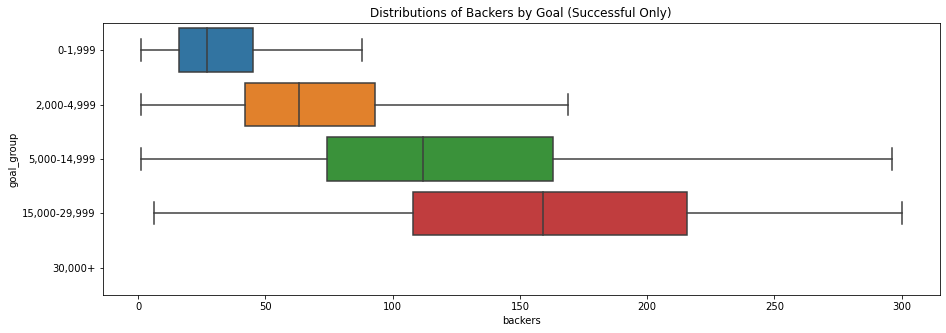

In [1647]:
## boxplots to show the distribution of backers across goal groups (successful only)

plt.figure(figsize = (15,5))
plt.title("Distributions of Backers by Goal (Successful Only)")
sns.boxplot(x = df3_successful["backers"], y = df3_successful["goal_group"], showfliers = False)

# normally distributed, obvious results

<AxesSubplot:title={'center':'Distributions of Backers by Goal (Failed Only)'}, xlabel='backers', ylabel='goal_group'>

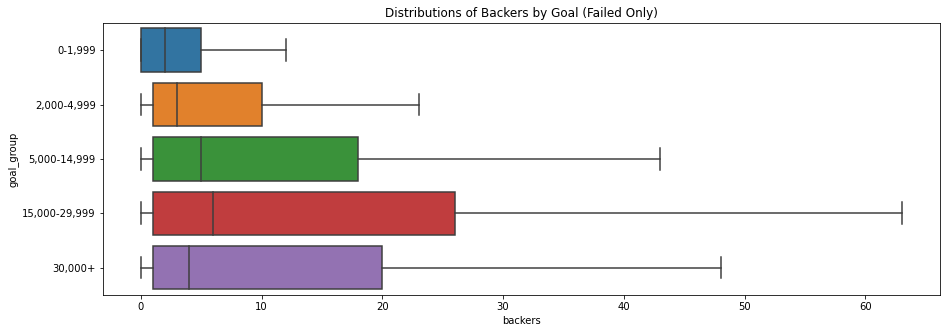

In [1648]:
## boxplots to show the distribution of backers across goal groups (failed only)

plt.figure(figsize = (15,5))
plt.title("Distributions of Backers by Goal (Failed Only)")
sns.boxplot(x = df3_failed["backers"], y = df3_failed["goal_group"], showfliers = False)

# not normally distributed, high skew across all categories

<AxesSubplot:title={'center':'Distributions of USD Pledged by Campaign Length (Successful Only)'}, xlabel='usd_pledged', ylabel='length_days_group'>

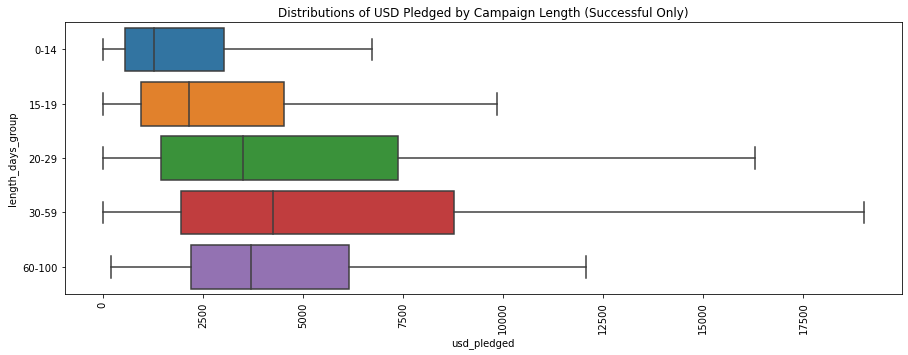

In [1649]:
## boxplots to show the distribution of money raised across backers groups (successful only)

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Distributions of USD Pledged by Campaign Length (Successful Only)")
sns.boxplot(x = df3_successful["usd_pledged"], y = df3_successful["length_days_group"], showfliers = False)

# interesting: highest median for campaigns 30-59 days

<AxesSubplot:title={'center':'Distributions of USD Pledged by Campaign Length (Failed Only)'}, xlabel='usd_pledged', ylabel='length_days_group'>

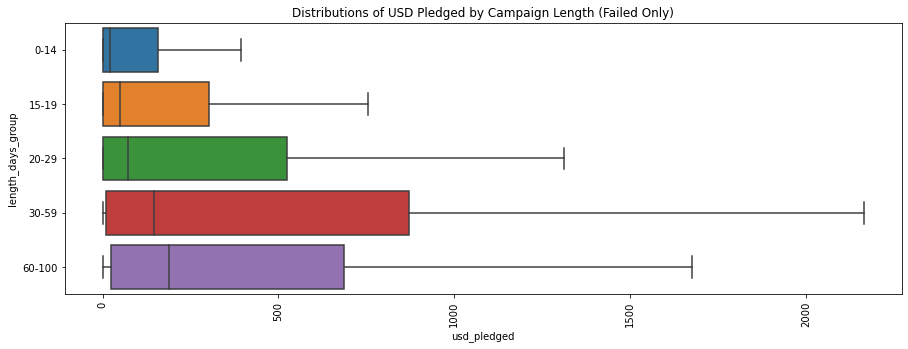

In [1650]:
## boxplots to show the distribution of money raised across backers groups (failed only)

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Distributions of USD Pledged by Campaign Length (Failed Only)")
sns.boxplot(x = df3_failed["usd_pledged"], y = df3_failed["length_days_group"], showfliers = False)

# interesting: highest median for campaigns 30-59 days

In [1651]:
## countplot showing mean usd pledged per main category (successful only)

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Average USD Pledged by Main Category (Successful Only)")
sns.barplot(x = df3_successful["main_category"], y = df3_successful["usd_pledged"])

<AxesSubplot:title={'center':'Average USD Pledged by Main Category (Successful Only)'}, xlabel='main_category', ylabel='usd_pledged'>

Error in callback <function flush_figures at 0x000002F5E9CB9040> (for post_execute):


KeyboardInterrupt: 

In [1652]:
df3_successful["usd_pledged"].groupby(df3_successful["main_category"]).mean()

main_category
Art             3910.421638
Comics          4120.002392
Crafts          3041.753550
Dance           4359.705666
Design          7142.651457
Fashion         6818.548622
Film & Video    6072.163008
Food            7937.660774
Games           5687.599847
Journalism      4736.806434
Music           5035.685510
Photography     5085.904818
Publishing      4568.803430
Technology      7375.566438
Theater         4091.518944
Name: usd_pledged, dtype: float64

<AxesSubplot:title={'center':'Average USD Pledged by Main Category (Failed Only)'}, xlabel='main_category', ylabel='usd_pledged'>

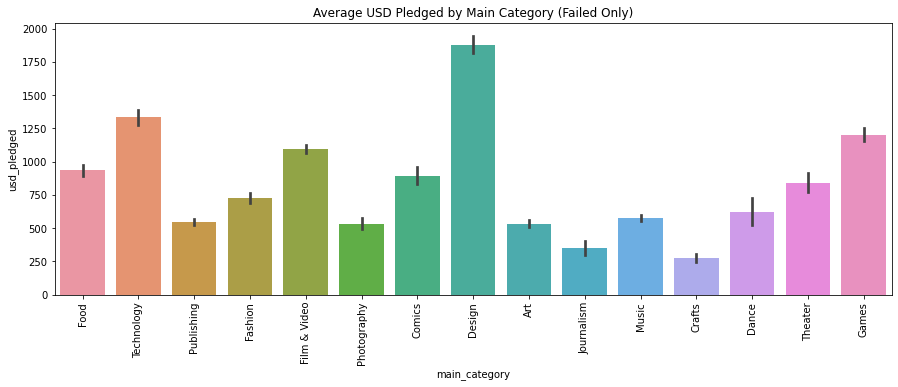

In [1653]:
## countplot showing mean usd pledged per main category (failed only)

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Average USD Pledged by Main Category (Failed Only)")
sns.barplot(x = df3_failed["main_category"], y = df3_failed["usd_pledged"])

In [ ]:
## countplot showing mean usd pledged per main category (successful only)

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Average USD Pledged by Backers Group (Successful Only)")
sns.barplot(x = df3_successful["backers_group"], y = df3_successful["usd_pledged"])

# obvious results

In [ ]:
## countplot showing mean usd pledged per main category (failed only)

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Average USD Pledged by Backers Group (Failed Only)")
sns.barplot(x = df3_failed["backers_group"], y = df3_failed["usd_pledged"])

# obvious results (but failed projects still raise more money)

In [ ]:
df3["length_days_group"].groupby(df3["length_days_group"]).count()

In [ ]:
df3_successful["usd_pledged"].groupby(df3_successful["length_days_group"]).median()

In [ ]:
pd.crosstab(df3_successful["length_days_group"], df3_successful["goal_group"], margins = True)

In [ ]:
pd.crosstab(df3_successful["goal_group"], df3_successful["backers_group"], margins = True)

In [ ]:
pd.crosstab(df3_successful["length_days_group"], df3_successful["backers_group"], margins = True)

In [ ]:
pd.crosstab(df3_successful["goal_group"], df3_successful["length_days_group"], margins = True)

In [ ]:
## countplot showing mean goal per main category (successful only)

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Average Goal by Backers Group (Successful Only)")
sns.barplot(x = df3_successful["backers_group"], y = df3_successful["goal"])

# Corresponds with info above, where each mean falls within the range listed above

In [ ]:
pd.crosstab(df3_failed["goal_group"], df3_failed["pct_funded_group"], margins = True)


# 199/129720 = 0.15% of failed projects ALMOST meet goal (90-99%) - which ones are these?

In [ ]:
df3_failed["goal"].groupby(df3_failed["pct_funded_group"]).mean()

# 0.15% of failed projects ALMOST meet goal (90-99%)
## average goal of these projects is $14,049

In [ ]:
df3_failed["length_days"].groupby(df3_failed["pct_funded_group"]).mean()

# 0.15% of failed projects ALMOST meet goal (90-99%)
## average length of these projects is 33 days

In [ ]:
df3_failed["backers"].groupby(df3_failed["pct_funded_group"]).mean()

# 0.15% of failed projects ALMOST meet goal (90-99%)
## average backers of these projects is 102

In [ ]:
## focus on campaign length

In [ ]:
# success by campaign length and goal

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Success by Campaign Length")
sns.countplot(x=df3["length_days_group"], hue = df3["state_binary"])

In [ ]:
# sucess by campaign length and goal

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Success by Campaign Length and Goal")
sns.barplot(x=df3["length_days_group"], y = df3["goal"], hue = df3["state"])

In [ ]:
# sucess by campaign length and goal

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Success by Campaign Length and Goal")
sns.barplot(x=df3["length_days_group"], y = df3["usd_pledged"], hue = df3["state"])

In [ ]:
df3_length_days_1.corr()

# very weak correlation between length and goal for campaigns of 0-14 days = -.025

In [ ]:
df3_length_days_2.corr()

# better correlation (but still weak) between length and goal for campaigns of 15-29 days = 0.045

In [ ]:
df3_length_days_3.corr()

# better correlation (but still weak) between length and goal for campaigns of 30-59 days = 0.077

In [ ]:
df3_length_days_4.corr()

# weaker correlation between length and goal for campaigns of 60-100 days = 0.019

In [ ]:
# sucess by main category within 0-14 days

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Success of Campaigns 0-14 Days by Main Category")
sns.countplot(x=df3_length_days_1["main_category"], hue = df3_length_days_1["state"])

#short campaigns more successful in film&video, art, music, theater, games

In [ ]:
# sucess by main category within 15-19 days

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Success of Campaigns 15-19 Days by Main Category")
sns.countplot(x=df3_length_days_2["main_category"], hue = df3_length_days_2["state"])

#medium-length campaigns more successful in comics, music, dance, theater

In [ ]:
# sucess by main category within 30-59 days

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Success of Campaigns 20-29 Days by Main Category")
sns.countplot(x=df3_length_days_3["main_category"], hue = df3_length_days_3["state"])

#short campaigns more successful in music, dance, theater

In [ ]:
# sucess by main category 30-59 days

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Success of Campaigns 30-59 Days by Main Category")
sns.countplot(x=df3_length_days_4["main_category"], hue = df3_length_days_4["state"])

#short campaigns more successful in art, music, dance, and theater

In [ ]:
# sucess by main category 30-59 days

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Success of Campaigns 30-59 Days by Main Category")
sns.countplot(x=df3_length_days_4["main_category"], hue = df3_length_days_4["state"])

#short campaigns more successful in art, music, dance, and theater

In [ ]:
# sucess by main category 60+ days

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Success of Campaigns 60+ Days by Main Category")
sns.countplot(x=df3_length_days_5["main_category"], hue = df3_length_days_5["state"])

#short campaigns more successful in art, music, dance, and theater

In [ ]:
df3.corr()

In [ ]:
# scatterplot showing length and percent funded by success

sns.lmplot(data = df3, x = 'pct_funded', y = 'length_days', fit_reg = True, hue = "state_binary")

plt.grid()

# r = -0.034

In [ ]:
# scatterplot showing length (0-14 days only) and percent funded by success

sns.lmplot(data = df3_length_days_1, x = 'pct_funded', y = 'length_days', fit_reg = True, hue = "state_binary")

plt.grid()

# r = -0.017

In [ ]:
# scatterplot showing length (15-29 days only) and percent funded by success

sns.lmplot(data = df3_length_days_2, x = 'pct_funded', y = 'length_days', fit_reg = True, hue = "state_binary")

plt.grid()

# r = -0.031

In [ ]:
# scatterplot showing length (30-59 days only) and percent funded by success

sns.lmplot(data = df3_length_days_3, x = 'pct_funded', y = 'length_days', fit_reg = True, hue = "state_binary")

plt.grid()

# r = -0.038

In [ ]:
# scatterplot showing length (60+ days only) and percent funded by success

sns.lmplot(data = df3_length_days_4, x = 'pct_funded', y = 'length_days', fit_reg = True, hue = "state_binary")

plt.grid()

# r = -0.038

In [ ]:
df3_successful.corr()

In [ ]:
df3_failed.corr()

# Creating Datasets of Sub-Groups (Main Categories)

In [ ]:
# for sub-group analysis creating a dataset with main category = food only

df3_food = df3.copy()

In [ ]:
df3_food["Food Main Category"] = np.where(df3["main_category"]=="Food", "Y", "N")
df3_food.head()

In [ ]:
df3_food.drop(df3_food.loc[df3_food["Food Main Category"]=="N"].index, inplace = True)

In [ ]:
df3_food.info()

In [ ]:
# for sub-group analysis creating a dataset with main category = techonology only

df3_tech = df3.copy()
df3_tech["Tech Main Category"] = np.where(df3["main_category"]=="Technology", "Y", "N")
df3_tech.info()

In [ ]:
df3_tech.drop(df3_tech.loc[df3_tech["Tech Main Category"]=="N"].index, inplace = True)
df3_tech.info()

In [ ]:
# for sub-group analysis creating a dataset with main category = publishing only

df3_pub = df3.copy()
df3_pub["Publishing Main Category"] = np.where(df3_pub["main_category"]=="Publishing", "Y", "N")
df3_pub.info()

In [ ]:
df3_pub.drop(df3_pub.loc[df3_pub["Publishing Main Category"]=="N"].index, inplace = True)
df3_pub.info()

In [ ]:
# for sub-group analysis creating a dataset with main category = fashion only

df3_fash = df3.copy()
df3_fash["Fashion Main Category"] = np.where(df3_fash["main_category"]=="Fashion", "Y", "N")
df3_fash.info()

In [ ]:
df3_fash.drop(df3_fash.loc[df3_fash["Fashion Main Category"]=="N"].index, inplace = True)
df3_fash.info()

In [ ]:
# for sub-group analysis creating a dataset with main category = film & video only

df3_film = df3.copy()
df3_film["Film & Video Main Category"] = np.where(df3_film["main_category"]=="Film & Video", "Y", "N")
df3_film.info()

In [ ]:
df3_film.drop(df3_film.loc[df3_film["Film & Video Main Category"]=="N"].index, inplace = True)
df3_film.info()

In [ ]:
# for sub-group analysis creating a dataset with main category = photography only

df3_photo = df3.copy()
df3_photo["Photography Main Category"] = np.where(df3_photo["main_category"]=="Photography", "Y", "N")
df3_photo.info()

In [ ]:
df3_photo.drop(df3_photo.loc[df3_photo["Photography Main Category"]=="N"].index, inplace = True)
df3_photo.info()

In [ ]:
# for sub-group analysis creating a dataset with main category = comics only

df3_comics = df3.copy()
df3_comics["Comics Main Category"] = np.where(df3_comics["main_category"]=="Comics", "Y", "N")
df3_comics.info()

In [ ]:
df3_comics.drop(df3_comics.loc[df3_comics["Comics Main Category"]=="N"].index, inplace = True)
df3_comics.info()

In [ ]:
# for sub-group analysis creating a dataset with main category = design only

df3_design = df3.copy()
df3_design["Design Main Category"] = np.where(df3_design["main_category"]=="Design", "Y", "N")
df3_design.info()

In [ ]:
df3_design.drop(df3_design.loc[df3_design["Design Main Category"]=="N"].index, inplace = True)
df3_design.info()

In [ ]:
# for sub-group analysis creating a dataset with main category = art only

df3_art = df3.copy()
df3_art["Art Main Category"] = np.where(df3_art["main_category"]=="Art", "Y", "N")
df3_art.info()

In [ ]:
df3_art.drop(df3_art.loc[df3_art["Art Main Category"]=="N"].index, inplace = True)
df3_art.info()

In [ ]:
# for sub-group analysis creating a dataset with main category = journalism only

df3_journ = df3.copy()
df3_journ["Journalism Main Category"] = np.where(df3_journ["main_category"]=="Journalism", "Y", "N")
df3_journ.info()

In [ ]:
df3_journ.drop(df3_journ.loc[df3_journ["Journalism Main Category"]=="N"].index, inplace = True)
df3_journ.info()

In [ ]:
# for sub-group analysis creating a dataset with main category = music only

df3_music = df3.copy()
df3_music["Music Main Category"] = np.where(df3_music["main_category"]=="Music", "Y", "N")
df3_music.info()

In [ ]:
df3_music.drop(df3_music.loc[df3_music["Music Main Category"]=="N"].index, inplace = True)
df3_music.info()

In [ ]:
# for sub-group analysis creating a dataset with main category = crafts only

df3_crafts = df3.copy()
df3_crafts["Crafts Main Category"] = np.where(df3_crafts["main_category"]=="Crafts", "Y", "N")
df3_crafts.info()

In [ ]:
df3_crafts.drop(df3_crafts.loc[df3_crafts["Crafts Main Category"]=="N"].index, inplace = True)
df3_crafts.info()

In [ ]:
# for sub-group analysis creating a dataset with main category = dance only

df3_dance = df3.copy()
df3_dance["Dance Main Category"] = np.where(df3_dance["main_category"]=="Dance", "Y", "N")
df3_dance.info()

In [ ]:
df3_dance.drop(df3_dance.loc[df3_dance["Dance Main Category"]=="N"].index, inplace = True)
df3_dance.info()

In [ ]:
# for sub-group analysis creating a dataset with main category = theater only

df3_thea = df3.copy()
df3_thea["Theater Main Category"] = np.where(df3_thea["main_category"]=="Theater", "Y", "N")
df3_thea.info()

In [ ]:
df3_thea.drop(df3_thea.loc[df3_thea["Theater Main Category"]=="N"].index, inplace = True)
df3_thea.info()

In [ ]:
# for sub-group analysis creating a dataset with main category = games only

df3_games = df3.copy()
df3_games["Games Main Category"] = np.where(df3_games["main_category"]=="Games", "Y", "N")
df3_games.info()

In [ ]:
df3_games.drop(df3_games.loc[df3_games["Games Main Category"]=="N"].index, inplace = True)
df3_games.info()

# Visuals and Correlations within Main Category Sub-Groups

### Main Category: ART 

In [ ]:
## state by campaign sub-category (crosstab)
pd.crosstab(df3_art["category"], df3["state"])

## Success rates within ART MAIN CATEGORY: not much variation

#art: 45%
#ceramics: 46%
#conceptual art: 40%
#digital art: 31%
#illustration: 53%
#installations: 56%
#mixed media: 37%
#painting: 38%
#performance art: 47%
#public art: 55%
#sculpture: 43%
#textiles: 30%
#video art: 28%

In [ ]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("ART: Average Goal by Pct Funded Group and State")
sns.barplot(data = df3_art, x="pct_funded_group", y= "goal", hue = "state")

#How are projects successful with less than 100% funded??

In [ ]:
df3_art.loc[(df3_art["pct_funded"]<100) & (df3_art["state"]=="successful")]

#confirmation that no project with < 100% funded is successful

In [ ]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("ART: Average Goal by Main Category and State")
sns.barplot(data = df3_art, x="category", y= "goal", hue = "state")

#interesting: average goal of successful projects across all subcategories seems to be the same (next line calculate this)

In [ ]:
df3_art["goal"].loc[df3_art["state"]=="successful"].mean()

#mean goal for successful art projects = $4,292

In [ ]:
df3_art["goal"].loc[df3_art["state"]=="successful"].median()

#median goal for successful art projects = $2,000

In [ ]:
pd.set_option('display.max_rows', None) ## show all rows in dataset

In [ ]:
index_val = ["state", "category", "length_days_group"]

# mean average goal by state, backers_group, length_days_group 
pd.pivot_table(data= df3_art, index=index_val, values=['goal'])

#### ART: Regression

Linear Regression (where y represents pct_funded): unsuccessful

In [ ]:
df3_art.corr()

# strongest correlation between backers and usd pledged, far second place is backers and pct funded

In [ ]:
# creating the 1st regression model
result1_art = sm.ols('pct_funded ~ length_days + goal + backers + usd_pledged', data = df3_art).fit()

result1_art.summary()

#Adj R-squared is very low

In [ ]:
# creating the 2nd regression model (same as 1st but without intercept)
result2_art = sm.ols('pct_funded ~ length_days + backers + goal + usd_pledged -1', data = df3_art).fit()

result2_art.summary()

#Adj R-squared is better but still very low

In [ ]:
# creating the 3rd regression model
result3_art = sm.ols('pct_funded ~ length_days + backers + usd_pledged - 1', data = df3_art).fit()

result3_art.summary()

#Adj R-squared is still very low

In [ ]:
# creating the 4th regression model
result4_art = sm.ols('pct_funded ~ backers + usd_pledged -1', data = df3_art).fit()

result4_art.summary()

#Adj R-squared is still very low

Logistic Regression

In [ ]:
df3_art

### COMICS 

In [ ]:
df3_comics["goal"].loc[(df3_comics["state"]=="successful") & ((df3_comics["length_days_group"]=="20-29") | (df3_comics["length_days_group"]=="30-59"))].median()

#median goal for successful comics projects between 20-59 days = $3,000

In [ ]:
df3_comics["goal"].loc[(df3_comics["state"]=="successful") & ((df3_comics["length_days_group"]=="20-29") | (df3_comics["length_days_group"]=="30-59"))].mean()

#mean goal for successful comics projects between 20-59 days = $5,315

### CRAFTS 

In [ ]:
df3_crafts["goal"].loc[df3_crafts["state"]=="successful"].mean()

#mean goal for successful crafts projects = $2,947

### DANCE 

In [ ]:
df3_dance["goal"].loc[(df3_dance["state"]=="successful") & ((df3_dance["length_days_group"]=="20-29") | (df3_dance["length_days_group"]=="30-59"))].median()

#median goal for successful dance projects within 20-59 days = $3,000

In [ ]:
df3_dance["goal"].loc[(df3_dance["state"]=="successful") & ((df3_dance["length_days_group"]=="20-29") | (df3_dance["length_days_group"]=="30-59"))].mean()

#mean goal for successful dance projects within 20-59 days = $3,000

### DESIGN 

In [ ]:
df3_design["goal"].loc[df3_design["state"]=="successful"].mean()

#mean goal for successful design projects = $13,335

### FASHION 

In [ ]:
df3_fash["goal"].loc[df3_fash["state"]=="successful"].mean()

#mean goal for successful fashion projects = $9,532

### FILM & VIDEO

In [ ]:
df3_film["goal"].loc[df3_film["state"]=="successful"].mean()

#mean goal for successful film & video projects = $9,402

### FOOD

In [ ]:
df3_food["goal"].loc[df3_food["state"]=="successful"].mean()

#mean goal for successful FOOD projects = $11,188

In [ ]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("FOOD: Average Goal by Main Category and State")
sns.barplot(data = df3_food, x="category", y= "goal", hue = "state")

#How are projects successful with less than 100% funded??

### GAMES

In [ ]:
df3_games["goal"].loc[df3_games["state"]=="successful"].mean()

#mean goal for successful games projects = $8,282

### JOURNALISM

In [ ]:
df3_journ["goal"].loc[df3_journ["state"]=="successful"].mean()

#mean goal for successful journalism projects = $8,394

### MUSIC

In [ ]:
df3_music["goal"].loc[(df3_music["state"]=="successful") & ((df3_music["length_days_group"]=="20-29") | (df3_music["length_days_group"]=="30-59"))].median()

#median goal for successful music projects within 20-59 days = $3,500

### PHOTOGRAPHY

In [ ]:
df3_photo["goal"].loc[df3_photo["state"]=="successful"].mean()

#mean goal for successful photography projects = $5,976

### PUBLISHING

In [ ]:
df3_pub["goal"].loc[df3_pub["state"]=="successful"].mean()

#mean goal for successful FOOD projects = $5,730

### TECHNOLOGY

In [ ]:
df3_tech["goal"].loc[df3_tech["state"]=="successful"].mean()

#mean goal for successful tech projects = $20,156

### THEATER

In [ ]:
df3_thea["goal"].loc[(df3_thea["state"]=="successful") & ((df3_thea["length_days_group"]=="20-29") | (df3_thea["length_days_group"]=="30-59"))].median()

#median goal for successful theater projects within 20-59 days = $2,800

# A Deeper Look at Aggregate Data

In [ ]:
index_val = ["state", "backers_group", "length_days_group"]

# mean average goal by state, backers_group, length_days_group 
pd.pivot_table(data= df3, index=index_val, values=['goal'])

#once again, we see that a lower goal is important for success

## Regression on Aggregate Data

In [ ]:
sns.countplot(data=df3, x="state_binary")

In [ ]:
mod1 = sm.logit('state_binary ~ length_days + goal + backers + usd_pledged', data=df3).fit()

mod1.summary()

# excellent p-value: the model fits the data well

In [ ]:
## create a dataframe with the variable names, OR's and p-values
# np.exp >> calculate the exponential of a given value

df3_odds = pd.DataFrame(np.exp(mod1.params), columns = ['OR'])

## pull the pvalues directly from the model

df3_odds["pvalue"] = mod1.pvalues

## create a variable to quickly determine sig

df3_odds["Sig"] = np.where(df3_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

## print new dataset

df3_odds

### Interpreting Logistic Regression on Aggregate Data
- For everyone one day increase in length of the campaign, the probability of the project  being successful decreases by 1.35%.
- For every one USD increase in the goal, the probability of the project being successful decreases by .05%.
- For every increase of one backer, the project's chances of success increase by 4%.

In [ ]:
# Naive Bayes Gaussian Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB   #import Gaussian Bayes modeling function
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
df3.count()

In [ ]:
gaussian_modeldf = df3[['length_days', 'goal', 'backers', 'state_binary']]
gaussian_modeldf.head()

In [ ]:
#dataframe with predicting features
X = gaussian_modeldf.drop('state_binary', axis=1)

#column of predictive target values
y = gaussian_modeldf['state_binary']

In [ ]:
#create training and test data
#will leave test size at default (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=592)

##random state: change this number a few times to see if you get similar results (computer doesn't always choose data randomly,

In [ ]:
#initialize Gaussian Bayes classifier
gnb = GaussianNB()

In [ ]:
#train the model to learn trends
gnb.fit(X_train, y_train)

In [ ]:
#predictive score of the model on the training data
gnb.score(X_train, y_train)

In [ ]:
#test the model on unseen data
#score predictive values in variable
y_pred = gnb.predict(X_test)

In [ ]:
#Confusion matrix shows which values model predicted correctly vs incorrectly

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Unsuccessful', 'Predicted Successful'],
    index=['True Unsuccessful', 'True Successful']
)

cm

In [ ]:
#predictive score of the model on the test data
gnb.score(X_test, y_test)

In [ ]:
#predictive score of the model for each predictive category
print(classification_report(y_test, y_pred))

In [ ]:
# Naive Bayes Bernoulli Classifier

In [ ]:
#import Bernoulli Naïve Bayes function from scikit-learn library
from sklearn.naive_bayes import BernoulliNB

In [ ]:
#initialize Bernoulli Naïve Bayes function to a variable
bnb = BernoulliNB()

In [ ]:
#build the model with training data
bnb.fit(X_train, y_train)

In [ ]:
#model's predictive score on the training data
bnb.score(X_train, y_train)

In [ ]:
#test the model on unseen data
#score predictive values in variable
y_pred = bnb.predict(X_test)

In [ ]:
#Confusion matrix shows which values model predicted correctly vs incorrectly

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Unsuccessful', 'Predicted Successful'],
    index=['True Unsuccessful', 'True Successful']
)

cm

In [ ]:
#predictive score of the model on the test data
bnb.score(X_test, y_test)

In [ ]:
sns.lmplot(data = df3, x = 'goal', y = 'length_days', fit_reg = False, hue = "state", height = 8, aspect = 1.5)
plt.title("Goal vs. Length_Days per State")

#looks like length doesn't matter as much as goal

In [ ]:
sns.lmplot(data = df3, x = 'goal', y = 'avg_pledge_per_backer', fit_reg = False, hue = "state", height = 8, aspect = 1.5)
plt.title("Goal vs. Avg Pledge per Backer")

# reaffirms that lower goal is more successful, directly correlates with average pledge per backer

In [ ]:
sns.lmplot(data = df3, x = 'length_days', y = 'avg_pledge_per_backer', fit_reg = False, hue = "state", height = 8, aspect = 1.5)
plt.title("Goal vs. Avg Pledge per Backer")

#interesting!  no apparent correlation between the two variables.  successful projects have lower goals

In [ ]:
# average number of backers and pledges by main category and subcategory 


In [ ]:
## state by campaign main category (crosstab)

pd.crosstab(df3["main_category"], df3["state"])

#success rates PER MAIN CATEGORY:
#art: 44%
#comics: 57% 
#crafts: 26%
#dance: 66%
#design: 39%
#fashion: 27%
#film&video: 42%
#food: 28%
#games: 41%
#journalism: 25%
#music: 53%
#photography: 34%
#publishing: 34%
#technology: 22%
#theater: 64%

# Film & Video, Music compose greatest % of overall success (across all main categories) on Kickstarter, as a result of having the most projects
# Dance, Theater, Comics most successful within their own category

In [ ]:
for col in df3_art:
    print(df3_art[col].unique())

In [ ]:
#arts = {"Sub-Category":['Art', 'Ceramics', 'Conceptual Art', 'Digital Art', 'Illustration',
 #'Installations', 'Mixed Media', 'Painting', 'Performance Art', 'Public Art',
 #'Sculpture', 'Textiles', 'Video Art'], 
            # "Success":[
(df.loc[df3_art["category"]=="Art" and df3_art["state"]=='successful'].index).sum()
             #"Fail":["Columbia", "Scotland", "USA", "Canada", "South Africa"], 


#df = pd.DataFrame(passenger)

#df

## <font color=#306EFF>Part 5: Group Presentation</font>

By now, your group should feel very comfortable with the aspects of the Kickstarter dataset. You should have a firm understanding of what Kickstarter is, what the dataset contains, the characteristics of each variable, how the variables interact with each other, and finally, which variables influence the outcome of the Kickstarter campaign. Can you put all this information together to tell a story about the data? Your presentation should include visualizations and clear answers to the two primary questions:

    1. What kinds of projects should the Kickstarter Marking Team focus their attention on?
    2. Why should the Marketing Team focus their attention in that direction?

In addition to these two questions, your presentation should cover the additional questions listed below. These questions should be easy to answer using the information you discovered above. When you are done, submit your completed notebook to me.   

### <font color=#306EFF>Questions to Answer</font>
1.	What main category is the most profitable (highest amount of money pledged)? 
2.	Which main category is the most popular (highest number of backers)?
3.	Which sub-categories are the most profitable and popular (top 3)?
4.	What are some of the characteristics of a successful Kickstarter campaign? 
5.	How does the success or failure of Kickstarter campaigns differ between main category, sub-category, country, and length of campaign? Please mention only the most notable – you do not need to detail the success/failure rate for each category/sub-category? 

***

### <font color=#306EFF>TIPS FOR A GREAT PRESENTATION</font>

* Start with the most important information (answers to the two questions above), and work backwards. The entire class will be working with the same dataset, therefore, we don't need to know the details of all your coding -- we just want to know what findings are most important to the questions. 
* Create clear visualizations. Make sure your audience can quickly and easily understand what your visualizations are showing. While you have a lot of options for how to style your visualizations, don't go overboard! 
* Make sure everyone understands what the visualization is showing; it should not have to stand on its own. When you present a visualization, you should be able to discuss what it means and what the significance is. 
* Use a single presentation format -- you can create a PowerPoint presentation or organize your notebook in a way that is easy to follow; reguardless of what your group puts together, you should use only ONE format. 